# Final Project - The Rumos Bank Marketing Campaign


Depois do vosso sucesso no primeiro projecto no The Rumos Bank, surge um novo projecto ainda mais empolgante! 

A equipa de marketing quer lançar uma nova campanha cujo objetivo é convencer os clientes a abrir depósitos a prazo.

Até agora a estratégia era ligar ao máximo número de pessoas, de forma indiscriminada, e tentar vender-lhe o produto. No entanto essa abordagem, para além de gastar mais recursos porque implica ter várias pessoas a ligar a todos os clientes, também é incomóda para alguns clientes que não gostam de ser incomodados com esse tipo de chamadas. Feitas as contas, chegou-se à conclusão que:

    - Por cada cliente identificado como um bom candidado, e é alvo da campanha mas não adere ao depósito a prazo, o banco tem um custo de 500euros.
    - Por cada cliente que é identificado como mau candidado, e como tal não é alvo da campanha mas na verdade era um bom candidado e iria aderir, o banco tem um custo de 2000euros.
    
Com base nesta informação, conseguem ajudar a equipa de marketing criando um modelo que seleccione os melhores candidatos para serem alvos da campanha, de forma a reduzir custos?


**O dataset contêm informação sobre todos os clientes que foram alvo da campanha:**

    1 - age 
    2 - job : type of job 
    3 - marital : marital status
    4 - education
    5 - default: has credit in default? 
    6 - housing: has housing loan? 
    7 - loan: has personal loan? 
    8 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
    9 - previous: number of contacts performed before this campaign and for this client 
    10 - poutcome: outcome of the previous marketing campaign 
    11 - emp.var.rate: employment variation rate - quarterly indicator 
    12 - cons.price.idx: consumer price index - monthly indicator
    13 - cons.conf.idx: consumer confidence index - monthly indicator 
    14 - euribor3m: euribor 3 month rate - daily indicator 
    15 - nr.employed: number of employees - quarterly indicator 

**Output:**
    
    y: has the client subscribed a term deposit? 
    
   

#### Perguntas:

    1. Quantas features estão disponíveis? Quantos clientes?
    2. Quantos clientes têm no dataset que efectivamente aderiram ao depósito a prazo? E quantos não o fizeram?
    3. Quais são as features mais relevantes para decidir se um cliente tem mais propensão para aderir ao depósito a prazo?
    4. Qual o algoritmo que levou aos melhores resultados?
    5. Qual/Quais as métricas de avaliação que usaram para comparar a performance dos vários modelos? Porquê?
    6. Qual é o custo que o banco tem sem nenhum modelo?
    7. Qual o custo que o banco passa a ter com o vosso modelo?
    
    
    
    

In [ ]:
# Run this cell to mount your Google Drive.
#from google.colab import drive
#drive.mount('/content/drive')

#root_path = '/content/drive/My Drive/2021_PG_ML/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  precision_recall_curve, PrecisionRecallDisplay, average_precision_score, RocCurveDisplay, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve
from sklearn.preprocessing import OrdinalEncoder, KBinsDiscretizer, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from scipy import stats

seed = 42

In [4]:
df = pd.read_csv('C:/Users/jacin/Documents/Kaggle_Challenges/Marketing_Campaign/bank_marketing_campaign.csv', sep=',')

# Visão Geral e Missing Values

In [ ]:
df.shape

(41188, 16)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
df['job'].nunique(), df['marital'].nunique(), df['education'].nunique(), df['default'].nunique(), df['housing'].nunique(), df['poutcome'].nunique(), df['y'].nunique()

(12, 4, 8, 3, 3, 3, 2)

In [ ]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
df['y'].value_counts(normalize = True)*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Não há valores em falta, pelo que não temos de avaliar estratégias de imputação de valores. No entanto, temos imensas variáveis categoricas que tem de ser passadas a numéricas, uma vez que a maioria dos modelos mais simples não suportam este tipo de informação. Mas primeiro, alguma análise exploratória de dados!

# EDA - Feature a Feature

* **y**

Variável target categórica que deve ser passada a binária (no = 0, yes = 1). Pela sua natureza, torna este um problema de classificação.

In [ ]:
df['y'] = df['y'].map(lambda x: 0 if x == 'no' else 1)

In [ ]:
df['y'].value_counts(normalize = True)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


* ***age***

Variável numérica continua com alguns potenciais outliers revelados pelo boxplot.

Não tem uma distribuição normal (p-value < 0.05, passando nos testes Kolmogorov-Smirnov ou Shapiro-Wilk), tem uma distribuição assimétrica positiva (positive skewness) e um pico acentuado (positive kurtosis) à volta da média (40 anos). 

Parece haver alguma correlação da idade com a aceitação do depósito - o pico da distribuição da idade coincide com o pico da distribuição da aceitação do depósito a prazo. No entanto, na cauda superior da distribuição, o que se vê é que foi oferecido depósitos a prazo a menos pessoas mais velhas e a taxa de adesão destas foi de aproximadamente 50%. É possível que pessoas mais velhas, não tão consideradas nesta campanha de marketing, sejam uma boa aposta de futuro.

In [ ]:
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [ ]:
stats.kurtosis(df['age']), stats.skew(df['age'])

(0.7910698035273853, 0.7846682380932289)

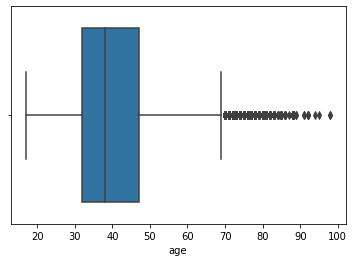

In [ ]:
sns.boxplot(data = df, x = 'age')

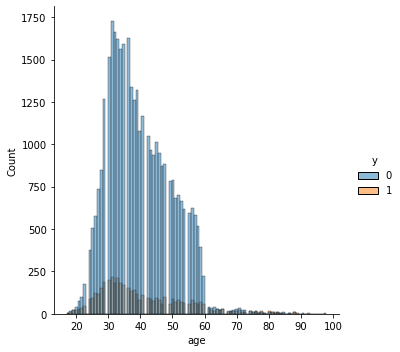

In [ ]:
sns.displot(data = df, x = 'age', hue = 'y', kind = 'hist');

In [ ]:
stats.kstest(df['age'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [ ]:
stats.shapiro(df['age'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9572664499282837, 0.0)

In [ ]:
def outlier_detector(x, n_std):
    mean = x.mean()
    std = x.std()
    return sum((x < mean - n_std * std) | (x > mean + n_std * std))

In [ ]:
outlier_detector(df['age'], 3)

369

In [ ]:
age_mean = df['age'].mean()
age_std = df['age'].std()

mask_p3std = age_mean + 3 * age_std
mask_m3std = age_mean - 3 * age_std
mask_p3std, age_mean, mask_m3std

(71.28781034874618, 40.02406040594348, 8.760310463140776)

In [ ]:
mask_lower = df['age'] < mask_m3std
mask_upper = df['age'] > mask_p3std
mask_lower.sum() + mask_upper.sum()

369

In [ ]:
y = 'y'
cond = mask_lower | mask_upper
df.loc[cond, y].value_counts()

# destes 369 outliers encontrados nas idades (idades acima dos 75), metade aderiram a depósitos a prazo e metade não aderiu, pelo que ainda é significativo.

0    188
1    181
Name: y, dtype: int64

In [ ]:
cond = df['age'] > 70
y = 'y'
df.loc[cond, y].value_counts(normalize = True)*100

0    52.132701
1    47.867299
Name: y, dtype: float64

É extremamente interessante que as pessoas mais velhas (acima de 70 anos, correspondem a cerca de 400 pessoas neste dataset), que neste dataset são consideradas outliers por terem sido tão pouco selecionadas para esta campanha, são as que têm maior taxa de adesão à campanha!

In [ ]:
cond = ((df['age'] > 50) & (df['age'] < 70))
y = 'y'
df.loc[cond, y].value_counts(normalize = True)*100

0    87.170317
1    12.829683
Name: y, dtype: float64

In [ ]:
cond = ((df['age'] > 30) & (df['age'] < 50))
y = 'y'
df.loc[cond, y].value_counts(normalize = True)*100

0    90.885437
1     9.114563
Name: y, dtype: float64

In [ ]:
cond = df['age'] < 30
y = 'y'
df.loc[cond, y].value_counts(normalize = True)*100

0    83.736109
1    16.263891
Name: y, dtype: float64

Entre os 50-70, foram selecionadas 6711 pessoas das quais apenas 12% aderiram à campanha. Dos 30 aos 50 foram selecionadas 25750 pessoas e apenas 9% aderiram.
E finalmente, na faixa etária dos menores de 30 anos, foram seleccionadas 5669 pessoas e cerca de 16% aderiram à campanha.

Em suma, as faixas etárias com maior adesão são os menores de 30 e os maiores de 70. No entanto, o grosso das pessoas seleccionadas estava entre os 30 e os 50. 

Uma vez que estes outliers têm extrema relevância por mostrarem um padrão e serem potencialmente preditivos do sucesso da campanha, decidi mantê-los e ver como é que estes vão afectar os modelos.

* ***job***

É uma variável categórica com 12 elementos únicos. O mais comum é administrador, com uma frequência de 25.3%.


In [ ]:
df['job'].describe()

count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object

In [ ]:
x = df['job'].value_counts(normalize = True)[0]
print(f"{x:.2%}")

25.30%


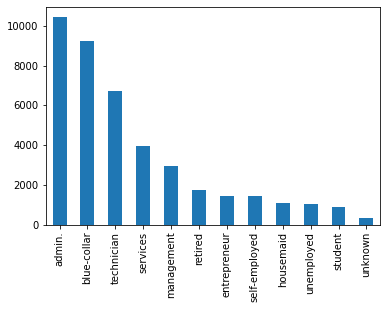

In [ ]:
df['job'].value_counts().plot.bar()

In [ ]:
df.groupby('job')['y'].value_counts(normalize = True)*100

job            y
admin.         0    87.027442
               1    12.972558
blue-collar    0    93.105684
               1     6.894316
entrepreneur   0    91.483516
               1     8.516484
housemaid      0    90.000000
               1    10.000000
management     0    88.782490
               1    11.217510
retired        0    74.767442
               1    25.232558
self-employed  0    89.514426
               1    10.485574
services       0    91.861930
               1     8.138070
student        0    68.571429
               1    31.428571
technician     0    89.173958
               1    10.826042
unemployed     0    85.798817
               1    14.201183
unknown        0    88.787879
               1    11.212121
Name: y, dtype: float64

In [ ]:
df.groupby('job')['age'].agg('mean')

job
admin.           38.187296
blue-collar      39.555760
entrepreneur     41.723214
housemaid        45.500000
management       42.362859
retired          62.027326
self-employed    39.949331
services         37.926430
student          25.894857
technician       38.507638
unemployed       39.733728
unknown          45.563636
Name: age, dtype: float64

Novamente, é interessante notar que pessoas reformadas e estudantes são as que têm maior taxa de adesão à campanha, reforçando a ideia com que ficámos da variável idade. O resto parece mais ou menos bem distribuido, com a maioria das profissões com uma taxa de adesão a rondar os 10% e idades médias próximas dos 40 anos.

Uma vez que esta variável tem 12 valores únicos e não tem uma ordem definida, vou aplicar um ordinal encoding sem que a ordem tenha grande significado.

In [ ]:
ord_encoder = OrdinalEncoder(categories = 'auto')
y = ord_encoder.fit_transform(X = df[['job']])
y = pd.DataFrame(y, columns= ['job_numerical'])
data = pd.concat([df, y], axis = 1)
data = data.drop(['job'], axis = 1)
data.head()


,age,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_numerical
0,56,married,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3.0
1,57,married,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0
2,37,married,high.school,no,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0
3,40,married,basic.6y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.0
4,56,married,high.school,no,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0


* ***marital***

Variável categórica com 4 elementos únicos em que o mas comum é casado com uma frequência de 60.52%.

No geral, marital status parece ter a mesma taxa de adesão à campanha - entre os 10 e 15%.

Mais uma vez, para transformar esta variável categórica em numérica, vou aplicar um Ordinal Encoding.

In [ ]:
df['marital'].describe()

count       41188
unique          4
top       married
freq        24928
Name: marital, dtype: object

In [ ]:
x = df['marital'].value_counts(normalize = True)[0]
print(f"{x:.2%}")

60.52%


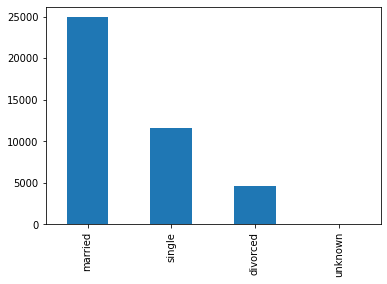

In [ ]:
df['marital'].value_counts().plot.bar()

In [ ]:
df.groupby('marital')['y'].value_counts(normalize = True)*100

marital   y
divorced  0    89.679098
          1    10.320902
married   0    89.842747
          1    10.157253
single    0    85.995851
          1    14.004149
unknown   0    85.000000
          1    15.000000
Name: y, dtype: float64

In [ ]:
ord_encoder = OrdinalEncoder(categories = 'auto')
y = ord_encoder.fit_transform(X = df[['marital']])
y = pd.DataFrame(y, columns= ['marital_numerical'])
data = pd.concat([data, y], axis = 1)
data = data.drop(['marital'], axis = 1)
data.head()

,age,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_numerical,marital_numerical
0,56,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3.0,1.0
1,57,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
2,37,high.school,no,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
3,40,basic.6y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1.0
4,56,high.school,no,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0


* ***education***

Esta variável tem 8 elementos únicos, sendo o mais comum o grau universitário com quase 30% de frequência.

In [ ]:
df['education'].describe()

count                 41188
unique                    8
top       university.degree
freq                  12168
Name: education, dtype: object

In [ ]:
x = df['education'].value_counts(normalize = True)[0]
print(f"{x:.2%}")

29.54%


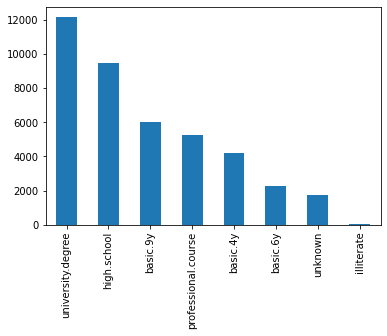

In [ ]:
df['education'].value_counts().plot.bar()

In [ ]:
df.groupby('education')['y'].value_counts(normalize = True)*100

education            y
basic.4y             0    89.750958
                     1    10.249042
basic.6y             0    91.797557
                     1     8.202443
basic.9y             0    92.175352
                     1     7.824648
high.school          0    89.164477
                     1    10.835523
illiterate           0    77.777778
                     1    22.222222
professional.course  0    88.651535
                     1    11.348465
university.degree    0    86.275477
                     1    13.724523
unknown              0    85.499711
                     1    14.500289
Name: y, dtype: float64

As pessoas que mais aderiram à campanha foram pessoas iliteradas (cerca de 22%), seguindo-se pessoas com esta categoria desconhecida (15%) e pessoas com um grau universitário (14%). 

Uma vez que a escolaridade tem uma ordem, vou usar ordinal encoding em que a ordem reflita o grau de escolaridade:

0 unknown; 1 illiterate; 2 basic.4y; 3 basic.6y; 4 basic.9y; 5 high.school; 6 professional.course; 7 university.degree

In [ ]:
education_degrees = {'unknown': 0, 'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3, 'basic.9y': 4, 'high.school': 5, 'professional.course': 6, 'university.degree': 7}

data['education'] = data['education'].replace(education_degrees)
data.head()

,age,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_numerical,marital_numerical
0,56,2,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3.0,1.0
1,57,5,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
2,37,5,no,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
3,40,3,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1.0
4,56,5,no,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0


* ***default***

Esta variável tem 3 elementos únicos e o mais frequente é não ter créditos em default, com 79% dos casos. 

In [ ]:
df['default'].describe()

count     41188
unique        3
top          no
freq      32588
Name: default, dtype: object

In [ ]:
x = df['default'].value_counts(normalize = True)[0]
print(f"{x:.2%}")

79.12%


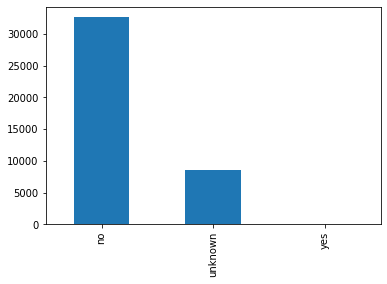

In [ ]:
df['default'].value_counts().plot.bar()

In [ ]:
df.groupby('default')['y'].value_counts(normalize = True)*100

default  y
no       0     87.121026
         1     12.878974
unknown  0     94.847040
         1      5.152960
yes      0    100.000000
Name: y, dtype: float64

Não há pessoas com créditos em default que tenha aderido à campanha para um depósito a prazo, o que faz sentido. 

Novamente, vou passar esta variável para numerical com ordinal encoding, em que:
-1 yes, 0 unknown, 1 no

In [ ]:
default_map = {'yes': -1, 'unknown': 0, 'no': 1}

data['default'] = data['default'].replace(default_map)
data.head()

,age,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_numerical,marital_numerical
0,56,2,1,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3.0,1.0
1,57,5,0,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
2,37,5,1,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
3,40,3,1,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1.0
4,56,5,1,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0


* ***housing***

Variável categórica com 3 valores unicos, em que o mais frequente é sim com 52%. Sensivelmente metade do dataset tem renda de casa para pagar ao banco, enquanto que a outra metade não tem ou não sabe. As frequências de aceitação da proposta de marketing parecem ser similares nas 3 categorias (à volta dos 10%).

In [ ]:
df['housing'].describe()

count     41188
unique        3
top         yes
freq      21576
Name: housing, dtype: object

In [ ]:
x = df['housing'].value_counts(normalize = True)[0]
print(f"{x:.2%}")

52.38%


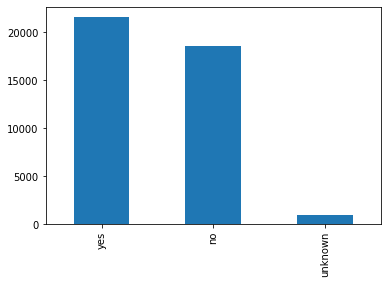

In [ ]:
df['housing'].value_counts().plot.bar()

In [ ]:
df.groupby('housing')['y'].value_counts(normalize = True)*100

housing  y
no       0    89.120395
         1    10.879605
unknown  0    89.191919
         1    10.808081
yes      0    88.380608
         1    11.619392
Name: y, dtype: float64

In [ ]:
housing_map = {'no': -1, 'unknown': 0, 'yes': 1}

data['housing'] = data['housing'].replace(housing_map)
data.head()

,age,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_numerical,marital_numerical
0,56,2,1,-1,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3.0,1.0
1,57,5,0,-1,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
2,37,5,1,1,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
3,40,3,1,-1,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1.0
4,56,5,1,-1,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0


* ***loan***

Variável com 3 valores únicos em que Não é o mais comum, com 82% de frequência - a maioria das pessoas alvo da campanha não tinham outros empréstimos pessoais. 

In [ ]:
df['loan'].describe()

count     41188
unique        3
top          no
freq      33950
Name: loan, dtype: object

In [ ]:
x = df['loan'].value_counts(normalize = True)[0]
print(f"{x:.2%}")

82.43%


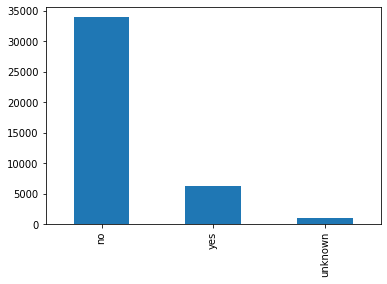

In [ ]:
df['loan'].value_counts().plot.bar()

In [ ]:
df.groupby('loan')['y'].value_counts(normalize = True)*100

loan     y
no       0    88.659794
         1    11.340206
unknown  0    89.191919
         1    10.808081
yes      0    89.068502
         1    10.931498
Name: y, dtype: float64

Mais uma vez, esta variável parece ter a mesma distribuição de aceitação em todas as categorias - sensivelmente 10%. 

In [ ]:
loan_map = {'yes': -1, 'unknown': 0, 'no': 1}

data['loan'] = data['loan'].replace(loan_map)
data.head()

,age,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_numerical,marital_numerical
0,56,2,1,-1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3.0,1.0
1,57,5,0,-1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
2,37,5,1,1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
3,40,3,1,-1,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1.0
4,56,5,1,-1,-1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0


* ***pdays***

Esta variável numérica codifica o número de dias que passaram desde que o cliente foi contactado pela ultima vez de uma campanha de marketing anterior. 

In [ ]:
df['pdays'].describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

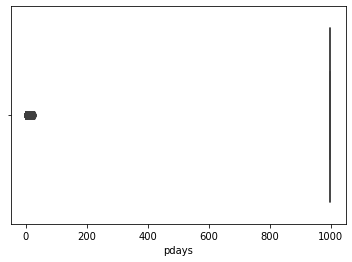

In [ ]:
sns.boxplot(data = df, x = 'pdays')

In [ ]:
df['pdays'].nunique(), df['pdays'].unique()

(27, array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
         12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
         20]))

In [ ]:
x = df['pdays'].value_counts(normalize = True)
x.head(5)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
Name: pdays, dtype: float64

Podemos verificar que as pessoas ou nunca/raramente foram contactadas (pdays = 999), o que corresponde a 96% do dataset, ou então foram contactadas algures nos últimos 26 dias (os restantes 4% do dataset)

In [ ]:
df.groupby('pdays')['y'].value_counts()

pdays  y
0      1       10
       0        5
1      0       18
       1        8
2      1       37
       0       24
3      1      298
       0      141
4      1       63
       0       55
5      1       29
       0       17
6      1      289
       0      123
7      1       40
       0       20
8      1       12
       0        6
9      1       35
       0       29
10     1       30
       0       22
11     1       15
       0       13
12     0       32
       1       26
13     1       28
       0        8
14     1       11
       0        9
15     1       16
       0        8
16     1        6
       0        5
17     0        6
       1        2
18     1        4
       0        3
19     0        2
       1        1
20     0        1
21     1        2
22     1        2
       0        1
25     1        1
26     1        1
27     1        1
999    0    36000
       1     3673
Name: y, dtype: int64

In [ ]:
cond = df['pdays'] < 999
y = 'y'
df.loc[cond, y].value_counts(normalize = True)*100


1    63.828383
0    36.171617
Name: y, dtype: float64

Pessoas que foram contactadas há menos tempo têm uma maior taxa de adesão à campanha do que pessoas que não são contactadas há muito tempo ou que talvez nunca tenham sido (>999, maioria do dataset). 

Uma vez que há uma classe maioritária e 26 classes minoritárias, mais vale converter esta variável em binária, onde zero é a classe maioritária e 1 todas as outras.

In [ ]:
# I designed this function to turn a numerical variable into binary for a different work in a module. It might come in hand for this exercise.
def binary(column = pd.Series, threshold = 0.9):
    
    #Function will receive a column and will round it to single values if needed
    rounded = column.map(lambda x: round(x))
    rounded = pd.Series(rounded)
    
    # Then, it will find the most common value and save it in a dictionary
    most_common_value = rounded.value_counts(normalize = True, ascending = False).head(1)
    top_most_common_value = most_common_value[most_common_value.keys()[0]]
    top_value = most_common_value.keys()[0]
    #print(top_most_common_value)
    #print(top_value)

    
    
    # Finally, it will compare the top most common value with the threshold: if it is higher, then it will binarize (0 to the most common, 1 to all rest); if not, it will print the message below   
    if top_most_common_value > threshold:
        rounded_binarized = rounded.map(lambda x: 0 if x == top_value else 1)
        rounded_binarized = pd.DataFrame(rounded_binarized)
        return rounded_binarized
   
    else:
        return print('Threshold not met - should not be binarized')
   
    return rounded_binarized

In [ ]:
data['pdays'] = binary(data['pdays'], threshold = 0.9)
data.head()

,age,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_numerical,marital_numerical
0,56,2,1,-1,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3.0,1.0
1,57,5,0,-1,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
2,37,5,1,1,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
3,40,3,1,-1,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1.0
4,56,5,1,-1,-1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0


* ***previous***

É uma variável numérica que quantifica o número de contactos feitos antes desta companha e com cada cliente.

Esta variável pode estar correlacionada com a variável anterior, uma vez que ambas quantificam contactos. Um dos passos finais do EDA é fazer um mapa de correlação para ver como é que as variáveis se relacionam umas com as outras e com o target.

In [ ]:
df['previous'].describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

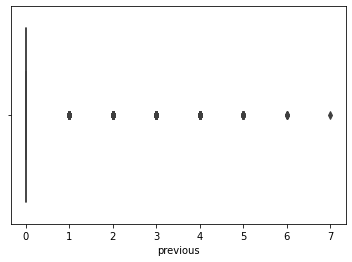

In [ ]:
sns.boxplot(data = df, x = 'previous')

In [ ]:
df['previous'].nunique(), df['previous'].unique()

(8, array([0, 1, 2, 3, 4, 5, 6, 7]))

In [ ]:
x = df['previous'].value_counts(normalize = True)
x

0    0.863431
1    0.110736
2    0.018306
3    0.005244
4    0.001700
5    0.000437
6    0.000121
7    0.000024
Name: previous, dtype: float64

In [ ]:
df.groupby('previous')['y'].value_counts()

previous  y
0         0    32422
          1     3141
1         0     3594
          1      967
2         0      404
          1      350
3         1      128
          0       88
4         1       38
          0       32
5         1       13
          0        5
6         1        3
          0        2
7         0        1
Name: y, dtype: int64

In [ ]:
df.groupby('previous')['y'].value_counts(normalize = True)*100

previous  y
0         0     91.167787
          1      8.832213
1         0     78.798509
          1     21.201491
2         0     53.580902
          1     46.419098
3         1     59.259259
          0     40.740741
4         1     54.285714
          0     45.714286
5         1     72.222222
          0     27.777778
6         1     60.000000
          0     40.000000
7         0    100.000000
Name: y, dtype: float64

In [ ]:
cond = df['previous'] > 0
y = 'y'
df.loc[cond, y].value_counts(normalize = True)*100

0    73.351111
1    26.648889
Name: y, dtype: float64

Tal como aconteceu com a variável anterior, existe uma classe maioritária (0 contactos) que corresponde a 86% do dataset e destes só 9% aderiram à campanha. O resto do dataset foi contactado no mínimo 1 e no máximo 7 vezes, sendo que no geral aderiram muito mais à campanha - o valor mais baixo de adesão foi 21% com 1 contacto e o valor mais alto foi 72% com 5 contactos. A exceção foi uma pessoa que foi contactada 7 vezes e disse sempre que não. 

Para já, vou deixar esta variável como está e ver se os diferentes valores têm impacto. Caso se confirme que não, a solução será torná-la binária, como fizemos na variável anterior. 

In [ ]:
data.head()

,age,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_numerical,marital_numerical
0,56,2,1,-1,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3.0,1.0
1,57,5,0,-1,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
2,37,5,1,1,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
3,40,3,1,-1,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1.0
4,56,5,1,-1,-1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0


* ***poutcome***

Esta variável categórica codifica qual foi o resultado para cada cliente da campanha de marketing anterior e tem três valores únicos, dos quais o mais frequente é nonexistent (não lhes foi apresentada?) com 86% de frequência. As duas outras opções são failure (não aderiram) e success (aderiram).


In [ ]:
df['poutcome'].describe()

count           41188
unique              3
top       nonexistent
freq            35563
Name: poutcome, dtype: object

In [ ]:
x = df['poutcome'].value_counts(normalize = True)[0]
print(f"{x:.2%}")

86.34%


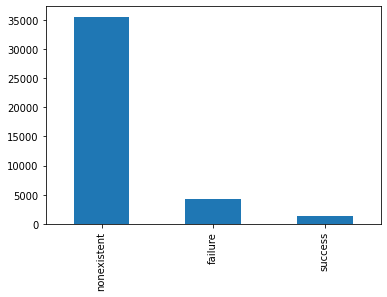

In [ ]:
df['poutcome'].value_counts().plot.bar()

In [ ]:
df.groupby('poutcome')['y'].value_counts(normalize = True)*100

poutcome     y
failure      0    85.771402
             1    14.228598
nonexistent  0    91.167787
             1     8.832213
success      1    65.112891
             0    34.887109
Name: y, dtype: float64

Esta variável parece mostrar que, se num contacto anterior tiver havido sucesso, a probabilidade de voltar a ser um sucesso é maior (34%) do que em caso de falhanço (14%). No entanto, a maioria das pessoas que foram contactadas para esta campanha de marketing não tinham sido contactadas antes e nessas apenas 9% aderiram à campanha.

Ordinal Encoding onde -1 é failure, 0 é nonexistent e 1 é success

In [ ]:
poutcome_map = {'failure': -1, 'nonexistent': 0, 'success': 1}

data['poutcome'] = data['poutcome'].replace(poutcome_map)
data.head()

,age,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_numerical,marital_numerical
0,56,2,1,-1,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0,3.0,1.0
1,57,5,0,-1,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
2,37,5,1,1,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0
3,40,3,1,-1,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0.0,1.0
4,56,5,1,-1,-1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,0,7.0,1.0


* ***emp.var.rate***

É uma variável numérica que codifica a taxa de variação do emprego (quarterly indicator). Parece ser uma variável que precisa de conhecimento de domínio para se perceber o que significam os valores. De acordo com o boxplot e o nosso outlier detector, não parece ter outliers.

In [ ]:
df['emp.var.rate'].describe()

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

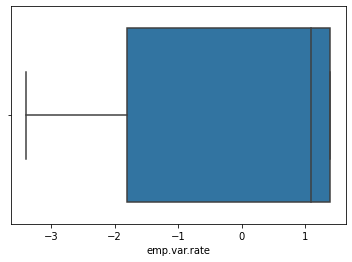

In [ ]:
sns.boxplot(data = df, x = 'emp.var.rate')

In [ ]:
outlier_detector(df['emp.var.rate'], 3)

0

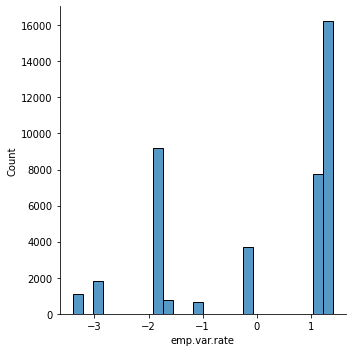

In [ ]:
sns.displot(data = df, x = 'emp.var.rate')

In [ ]:
cond = df['emp.var.rate'] >= 0
df.loc[cond, y].count()/len(df)*100

58.262115179178394

In [ ]:
cond = df['emp.var.rate'] >= 0
df.loc[cond, y].value_counts(normalize = True)*100

0    95.391091
1     4.608909
Name: y, dtype: float64

In [ ]:
cond = df['emp.var.rate'] < 0
df.loc[cond, y].count()/len(df)*100

41.7378848208216

In [ ]:
cond = df['emp.var.rate'] < 0
df.loc[cond, y].value_counts(normalize = True)*100

0    79.442732
1    20.557268
Name: y, dtype: float64

58% das pessoas têm uma emp.var.rate superior ou igual a zero e aderiram menos à campanha de marketing (5%). Por outro lado, 42% do dataset têm um emp.var.rate inferior a zero e tiveram uma taxa de adesão à campanha bastante superior (21%). 

Para já, vou deixar esta variável como está.

* ***cons.price.idx***

Variável numérica que demonstra o consumer price index (monthly indicator). Novamente, é mais um indicador que requer conhecimento de domínio para o compreender completamente.

Não aparenta ter outliers e parece ter pouca variância - min = 92.2, max = 94.8 e desvio padrão de 0.75. Tem uma distribuição mais achatada (negative kurtosis) e uma assimetria à esquerda (negative skew).

In [ ]:
df['cons.price.idx'].describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

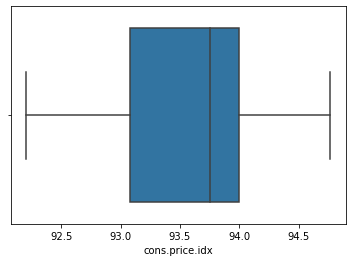

In [ ]:
sns.boxplot(data = df, x = 'cons.price.idx')

In [ ]:
outlier_detector(df['cons.price.idx'], 3)

0

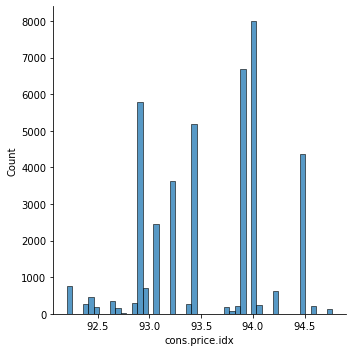

In [ ]:
sns.displot(data = df, x = 'cons.price.idx')

In [ ]:
stats.kurtosis(df['cons.price.idx']), stats.skew(df['cons.price.idx'])

(-0.8298535163032743, -0.23087924271977578)

In [ ]:
cond = df['cons.price.idx'] >= df['cons.price.idx'].mean()
y = 'y'
df.loc[cond, y].value_counts(normalize = True)*100

0    91.297201
1     8.702799
Name: y, dtype: float64

In [ ]:
cond = df['cons.price.idx'] < df['cons.price.idx'].mean()
y = 'y'
df.loc[cond, y].value_counts(normalize = True)*100

0    86.14972
1    13.85028
Name: y, dtype: float64

Pessoas com cons.price.idx acima da média aceitaram menos aderir à proposta (9%) comparado com as pessoas abaixo da média (14%). 

Para já, esta variável fica como está. Embora tenha pouca variação, aparenta ser correlacionada com o target.

* ***cons.conf.idx***

In [ ]:
df['cons.conf.idx'].describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

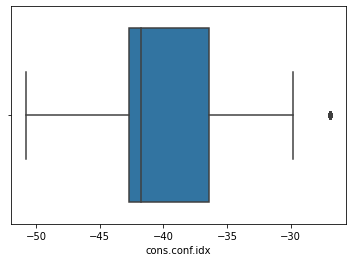

In [ ]:
sns.boxplot(data = df, x = 'cons.conf.idx')

In [ ]:
outlier_detector(df['cons.conf.idx'], 3)

0

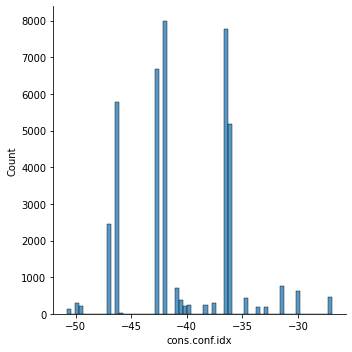

In [ ]:
sns.displot(data = df, x = 'cons.conf.idx')

In [ ]:
stats.kurtosis(df['cons.conf.idx']), stats.skew(df['cons.conf.idx'])

(-0.35866045494457843, 0.3031688173189229)

In [ ]:
cond = df['cons.conf.idx'] >= df['cons.conf.idx'].mean()
y = 'y'
df.loc[cond, y].value_counts(normalize = True)*100

0    86.130481
1    13.869519
Name: y, dtype: float64

In [ ]:
cond = df['cons.conf.idx'] < df['cons.conf.idx'].mean()
y = 'y'
df.loc[cond, y].value_counts(normalize = True)*100

0    90.550565
1     9.449435
Name: y, dtype: float64

Pessoas com cons.conf.idx inferior à média aderiram menos à promoção (9%), enquanto que pessoas com cons.conf.idx superior aderiram mais (13%).

Para já, esta variável fica como está pois, tal como a anterior, também parece ter uma correlação com o target.

* ***euribor3m***

Esta variável numérica codifica a euribor a 3 meses - daily indicator. Novamente, mais um conceito de domínio.

Não aparenta ter outliers.

In [ ]:
df['euribor3m'].describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

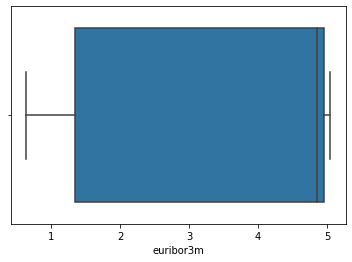

In [ ]:
sns.boxplot(data = df, x = 'euribor3m')

In [ ]:
outlier_detector(df['euribor3m'], 3)

0

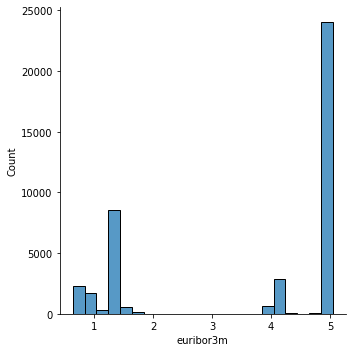

In [ ]:
sns.displot(data = df, x = 'euribor3m')

In [ ]:
cond = df['euribor3m'] >= df['euribor3m'].mean()
y = 'y'
df.loc[cond, y].value_counts(normalize = True)*100

0    95.166709
1     4.833291
Name: y, dtype: float64

In [ ]:
cond = df['euribor3m'] < df['euribor3m'].mean()
y = 'y'
df.loc[cond, y].value_counts(normalize = True)*100

0    75.549796
1    24.450204
Name: y, dtype: float64

Pessoas com valores de euribor a 3 meses mais baixos aderiram mais à campanha do que pessoas com valores de euribor a 3 meses mais altos.


* ***nr.employed***

Esta variável numérica indica o número de empregados (quarterly indicator).

Não aparenta ter outliers.

In [ ]:
df['nr.employed'].describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

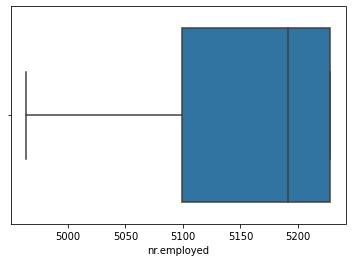

In [ ]:
sns.boxplot(data = df, x = 'nr.employed')

In [ ]:
outlier_detector(df['nr.employed'], 3)

0

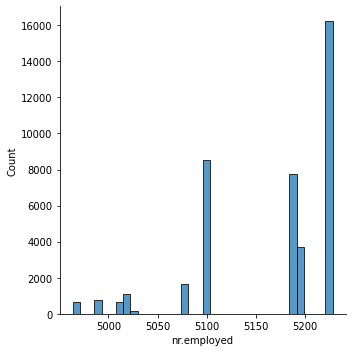

In [ ]:
sns.displot(data = df, x = 'nr.employed')

In [ ]:
cond = df['nr.employed'] >= df['nr.employed'].mean()
y = 'y'
df.loc[cond, y].value_counts(normalize = True)*100

0    95.164319
1     4.835681
Name: y, dtype: float64

In [ ]:
cond = df['nr.employed'] < df['nr.employed'].mean()
y = 'y'
df.loc[cond, y].value_counts(normalize = True)*100

0    75.544525
1    24.455475
Name: y, dtype: float64

Pessoas com nr.employed inferiores à média aderiram mais à campanha do que pessoas com nr.employed superior à média

# EDA - Relações entre Variáveis - Correlações e Visualização Gráfica

In [ ]:
data.dtypes

age                    int64
education              int64
default                int64
housing                int64
loan                   int64
pdays                  int64
previous               int64
poutcome               int64
emp.var.rate         float64
cons.price.idx       float64
cons.conf.idx        float64
euribor3m            float64
nr.employed          float64
y                      int64
job_numerical        float64
marital_numerical    float64
dtype: object

In [ ]:
data_transformed = data.copy()
data_transformed = data_transformed.drop(['y'], axis = 1)
data_transformed['y'] = data['y']
data_transformed.head(2)

,age,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_numerical,marital_numerical,y
0,56,2,1,-1,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,3.0,1.0,0
1,57,5,0,-1,1,0,0,0,1.1,93.994,-36.4,4.857,5191.0,7.0,1.0,0


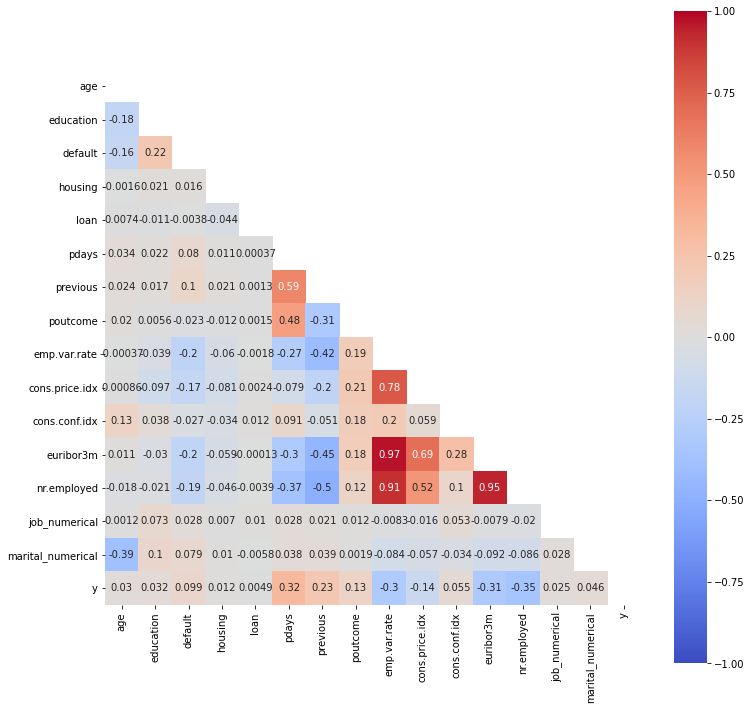

In [ ]:
corr = data_transformed.corr(method = 'pearson')
mask = np.triu(corr)
plt.figure(figsize=(12,12))
sns.heatmap(corr, vmin=-1, vmax=1, cmap="coolwarm", square=True, annot=True, mask=mask)

O mapa de correlação mostra correlações bastante altas (acima dos 50%) entre:
* nr.employed e emp.var.rate
* euribor3m e emp.var.rate
* euribor3m e nr.employed
* euribor3m e cons.price.idx
* cons.price.idx e nr.employed
* cons.price.idx e emp.var.rate
* previous e pdays
* previous e nr.employed

Destas, é importante decidir quais as que têm melhores correlações com o target e descartar as que tiverem menos correlações com o target. 

Relativamente a correlações com o target, pdays e previous tem correlação positiva e enquanto emp.var.rate, euribor3m e nr.employed tem correlação negativa. As restantes têm correlações mais fracas. 
 

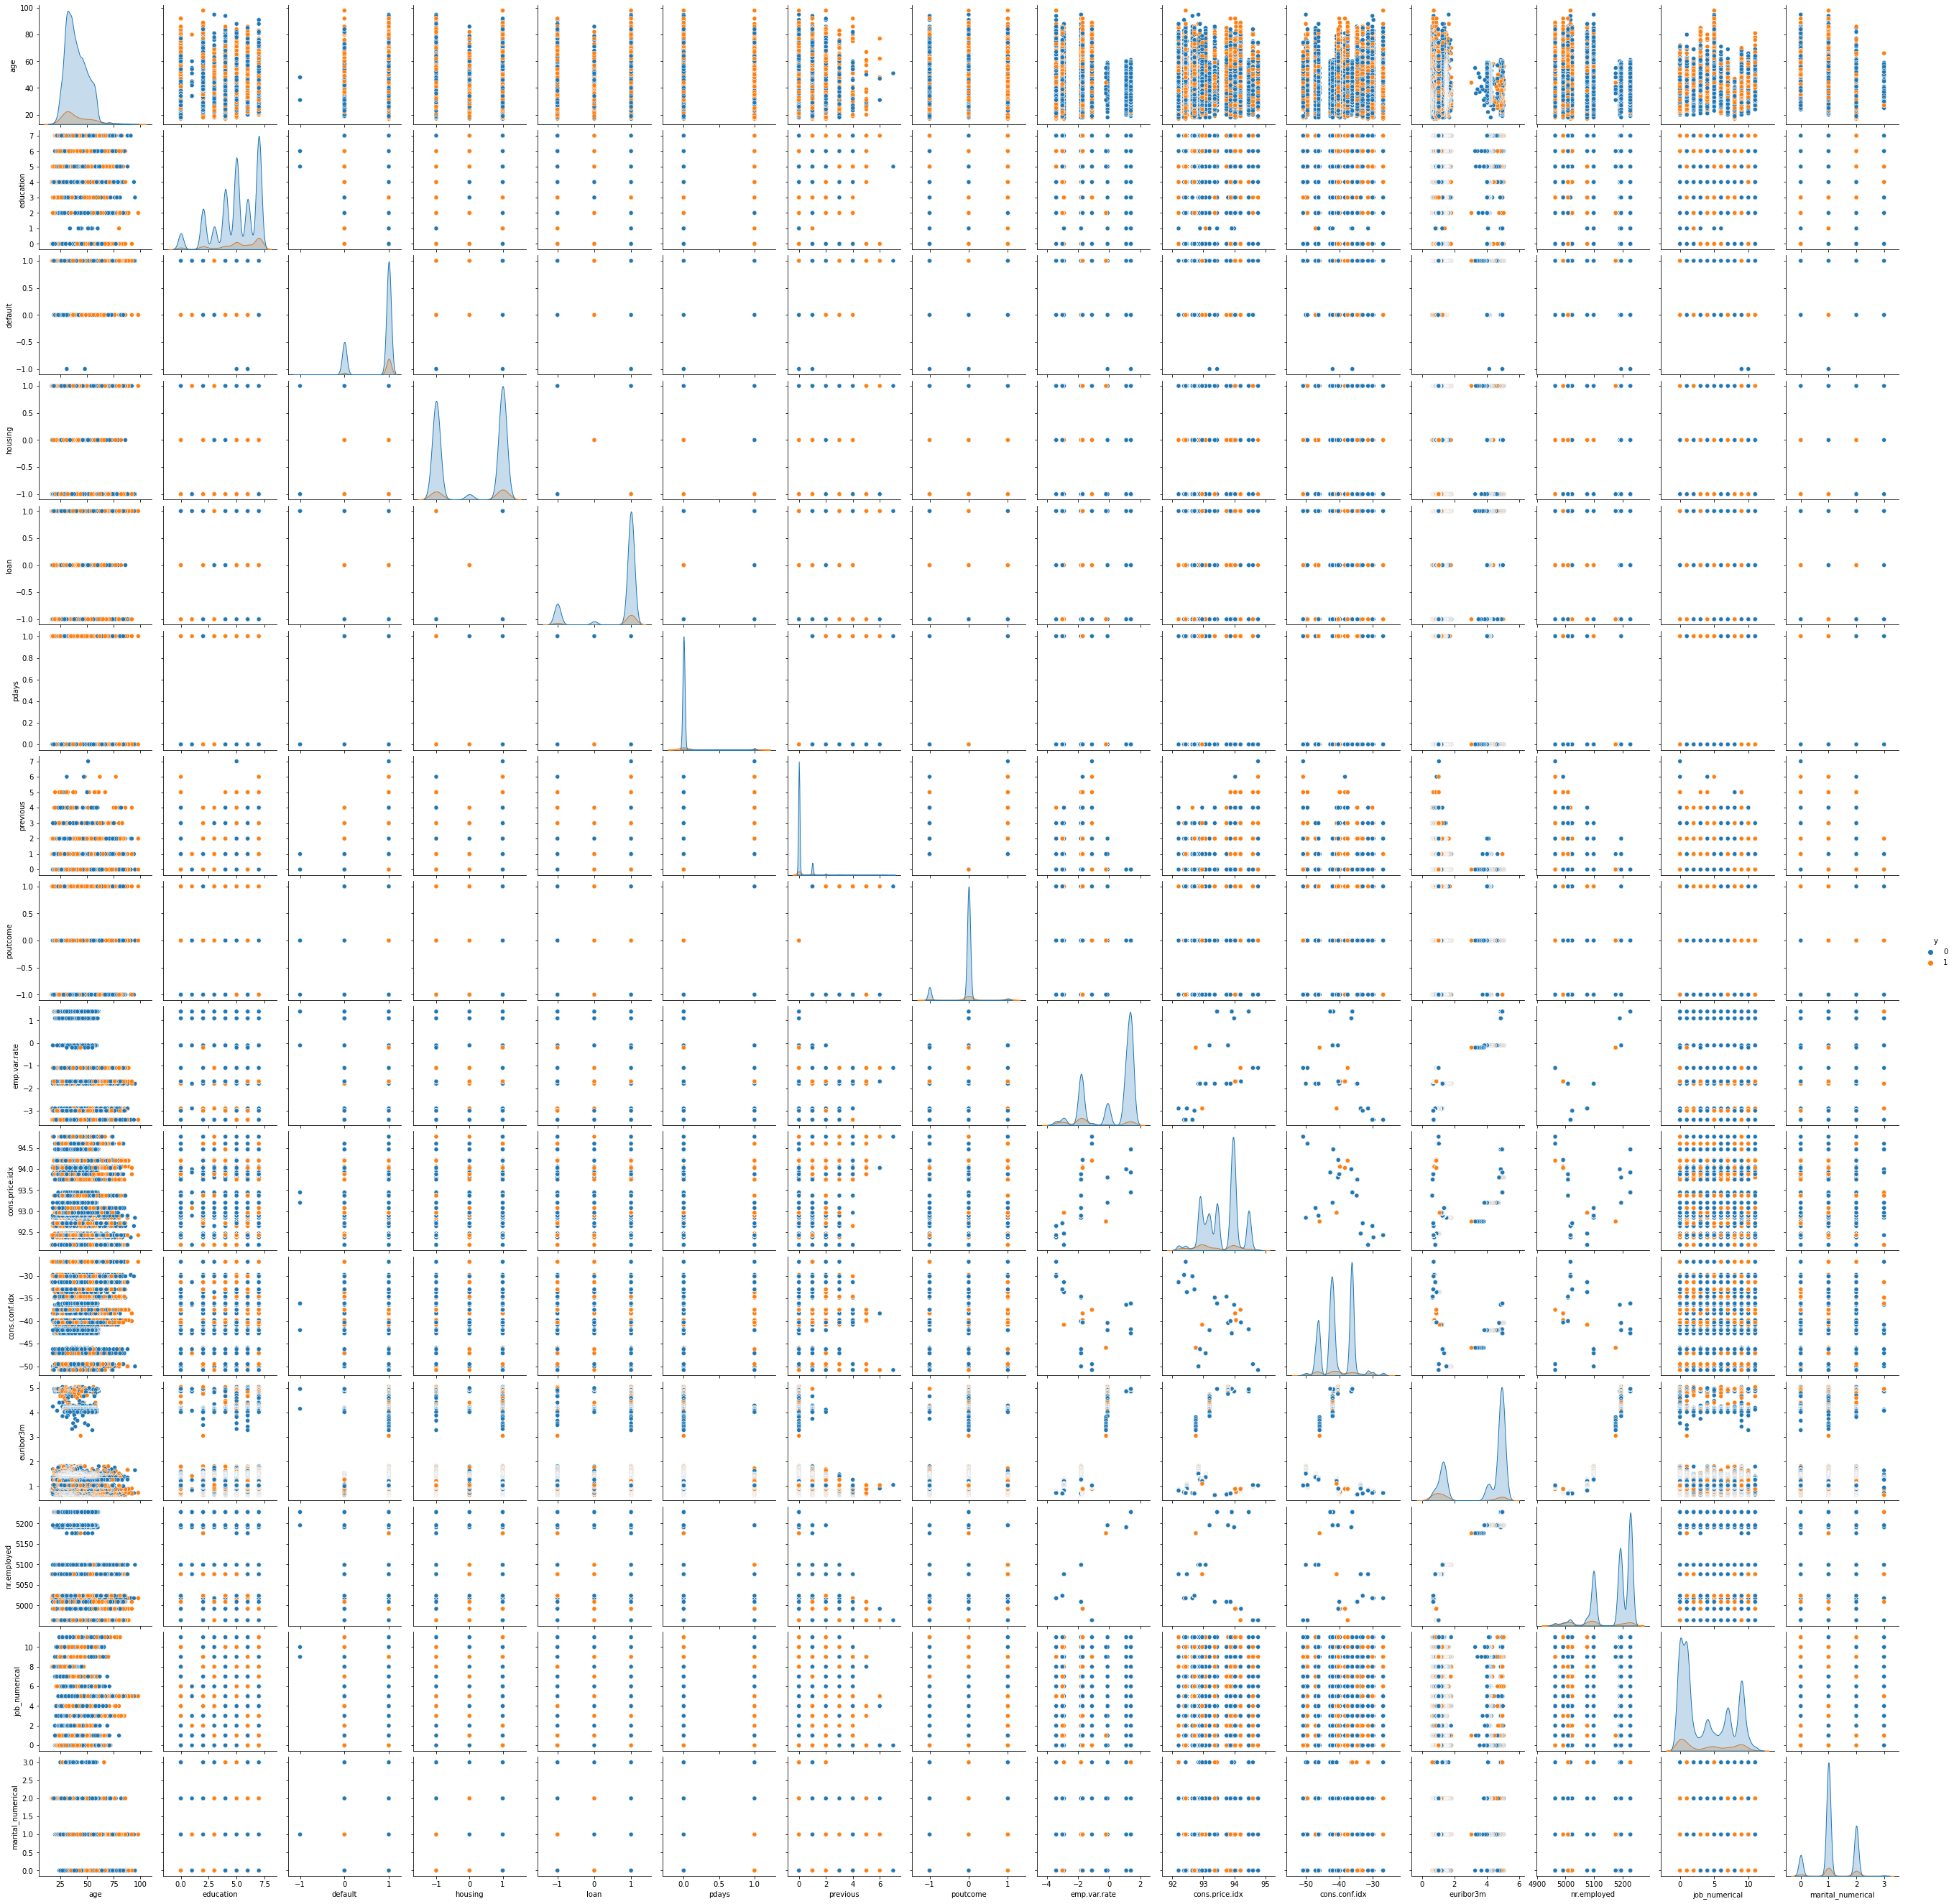

In [ ]:
sns.pairplot(data = data, hue = 'y')

In [ ]:
#sns.pairplot(data = data)

# Feature Selection 

Este passo permite-nos à partida, antes de correr qualquer modelo, filtrar features irrelevantes ou redundantes do dataset. Podemos fazer isto recorrendo a Variance Threshold e Pearson Correlation. Também temos ferramentas mais avançadas como Mutual Information e Recursive Feature Exclusion. Eu vou correr todos eles e seleccionar as features mais concensuais.

* Variance Threshold

Tenta criar o dataset mais simples possível assumindo que features com baixa variancia contêm menos informação. Se a variância for perto de zero, significa que é constante e por isso mesmo inútil (a excepção é se mesmo assim, seja altamente preditiva do target).

In [ ]:
data_transformed.var(axis = 0)

age                   108.602451
education               3.645471
default                 0.165394
housing                 0.970844
loan                    0.523620
pdays                   0.035430
previous                0.244927
poutcome                0.131686
emp.var.rate            2.467915
cons.price.idx          0.335056
cons.conf.idx          21.420215
euribor3m               3.008308
nr.employed          5220.283250
job_numerical          12.920864
marital_numerical       0.370762
y                       0.099966
dtype: float64

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_threshold = VarianceThreshold(0.1)
var_threshold

VarianceThreshold(threshold=0.1)

In [ ]:
data_varthreshold = var_threshold.fit_transform(data_transformed)

In [ ]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False])

De acordo com este método, apenas uma das variáveis não atinge o threshold de 0.1: pdays.  

No entanto, embora tenha pouca variação, está bastante correlacionada com o target.

* Pearson's Correlation p-value

Testa a hipótese nula em que a feature e o target são idenpendentes. Isto revela que features têm uma correlação com o target, identificando features interessantes.

In [ ]:
for col in data_transformed.columns:
    corr, pval = stats.pearsonr(data_transformed[col], data_transformed['y'])
    print(f"{col}\t{corr:>5.2f}\t{pval:.2f}\t{pval < 0.05}")

age	 0.03	0.00	True
education	 0.03	0.00	True
default	 0.10	0.00	True
housing	 0.01	0.02	True
loan	 0.00	0.32	False
pdays	 0.32	0.00	True
previous	 0.23	0.00	True
poutcome	 0.13	0.00	True
emp.var.rate	-0.30	0.00	True
cons.price.idx	-0.14	0.00	True
cons.conf.idx	 0.05	0.00	True
euribor3m	-0.31	0.00	True
nr.employed	-0.35	0.00	True
job_numerical	 0.03	0.00	True
marital_numerical	 0.05	0.00	True
y	 1.00	0.00	True


De acordo com este método, a única variável que não tem correlação significativa com o target é loan - p-value é superior a 0.05, pelo que não se rejeita a hipótese nula - target e loan podem ou não ser independentes. loan seria uma boa feature para deixar de fora do dataset.

* Mutual Information

Este método permite medir a infrmação que duas variáveis partilham, descobrindo assim informação acerca de dependências lineares e não-lineares. Para isto, precisamos de separar o dataset em X e y.

In [ ]:
X = data_transformed.drop(['y'], axis = 1)
y = data_transformed['y']

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X, y, random_state = seed)

array([0.01230633, 0.00273182, 0.01069091, 0.00285939, 0.00374112,
       0.03289024, 0.02012146, 0.03228044, 0.05793592, 0.06898864,
       0.06828738, 0.07398793, 0.06656823, 0.01029351, 0.00502814])

In [ ]:
X.columns

Index(['age', 'education', 'default', 'housing', 'loan', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'job_numerical', 'marital_numerical'],
      dtype='object')

Não há nenhuma variável que tenha um MI de zero, que indicaria total independência desta para o target, mas há várias com MI muito baixo: education, housing, loan e marital_numerical.

* Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
# Uma vez que temos 15 features, vamos tentar obter as 7 melhores
estimator = LogisticRegression(max_iter=800, random_state = seed)
selector = RFE(estimator, n_features_to_select = 7).fit(X, y)
selector.support_

array([False, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True, False, False,  True])

In [ ]:
selector.ranking_

array([7, 4, 1, 9, 3, 1, 1, 1, 1, 5, 2, 1, 8, 6, 1])

In [ ]:
X_features = pd.DataFrame()

features_names = X.columns

X_features['names'] = features_names
X_features['rank'] = selector.ranking_

X_features.sort_values('rank')

,names,rank
2,default,1
5,pdays,1
6,previous,1
7,poutcome,1
8,emp.var.rate,1
11,euribor3m,1
14,marital_numerical,1
10,cons.conf.idx,2
4,loan,3
1,education,4


Tendo todos estes métodos em atenção, decidi remover do dataset as seguintes variáveis:

* housing - baixa correlação, baixo valor de MI e baixa no ranking RFE
* loan - baixa correlação e baixo valor de MI 
* emp.var.rate - elevada correlação com euribor3m (mantenho a euribor por ter maior correlação com o target)
* cons.price.idx - elevada correlação com euribor3m 
* nr.employed - elevada correlação com euribor3m e baixa no ranking RFE
* job_numerical - baixa correlação com o target.

Ficamos assim com um dataset com 9 variáveis: age (porque a análise inicial da idade mostrava que havia um padrão interessante), education, default, pdays, previous, poutcome, cons.cont.idx, euribor3m e marital_numerical.

In [ ]:
# Dataset final sem Feature Selection
final_data_complete = X.copy()
final_data_complete['y'] = data['y']
final_data_complete.shape

(41188, 16)

In [ ]:
# Dataset final após Feature Selection
final_data_fs = X.drop(['housing', 'loan', 'emp.var.rate', 'cons.price.idx', 'nr.employed', 'job_numerical'], axis = 1)
final_data_fs['y'] = data['y']
final_data_fs.shape

(41188, 10)

Próximo passo - dividir o dataset em teste e treino:

In [ ]:
# completo
train_set_complete, test_set_complete = train_test_split(final_data_complete, test_size = 0.2, random_state = seed)

# com feature selection
train_set_fs, test_set_fs = train_test_split(final_data_fs, test_size = 0.2, random_state = seed)

In [ ]:
# completo
X_train_complete = train_set_complete.drop(['y'], axis = 'columns')
y_train_complete = train_set_complete['y']

X_test_complete = test_set_complete.drop(['y'], axis = 1)
y_test_complete = test_set_complete['y']

# com feature selection
X_train_fs = train_set_fs.drop(['y'], axis = 'columns')
y_train_fs = train_set_fs['y']

X_test_fs = test_set_fs.drop(['y'], axis = 1)
y_test_fs = test_set_fs['y']

Próximo passo - normalizar (já que é um requisito para a maioria dos modelos)

In [ ]:
scaler = MinMaxScaler()

# completo
features_names = X_train_complete.columns

X_train_complete = scaler.fit_transform(X_train_complete)
X_train_complete = pd.DataFrame(X_train_complete, columns = features_names)

X_test_complete = scaler.transform(X_test_complete)
X_test_complete = pd.DataFrame(X_test_complete, columns = features_names)

# com feature selection
features_names = X_train_fs.columns

X_train_fs = scaler.fit_transform(X_train_fs)
X_train_fs = pd.DataFrame(X_train_fs, columns = features_names)

X_test_fs = scaler.transform(X_test_fs)
X_test_fs = pd.DataFrame(X_test_fs, columns = features_names)

Antes de iniciar, vamos calcular a baseline, ou seja, o custo que temos sem nenhum modelo. Uma vez que nos são dados valores de custo, devemos usar estes para criar uma métrica que faça sentido à luz do negócio. Um banco pretende minimizar custos e maximizar lucros com a campanha de marketing, por isso vamos calcular o custo associado a ter Falsos Negativos (cliente identificado como mau candidato, mas era bom) e Falsos Positivos (cliente identificado como bom candidato, mas era mau). 

* True Positive - Estima-se que era bom candidato e é realmente
* True Negative - Estima-se que era mau candidato e é realmente
* False Positive - Estima-se que era bom candidato mas não é (custo 500€)
* False Negative - Estima-se que era mau candidato mas não é (custo 2000€)

$$ totalCost=500∗FP+2000∗FN $$

Vamos considerar que o banco assume que todos os clientes contactados vão aderir à campanha (df['y'] = 1)

(Note to self - aplicamos isto apenas no dataset de teste, para que os valores sejam comparáveis com os custos que vamos ter após aplicarmos os vários modelos)

In [ ]:
# os resultados são os mesmos independentemente se estamos a usar o dataset com feature selecion ou não
y_preds_all_yes = np.ones(y_test_complete.shape) 

tn, fp, fn, tp = confusion_matrix(y_test_complete, y_preds_all_yes).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 0
Number of True Positives: 935
Number of False Negatives: 0
Number of False Positives: 7303


In [ ]:
print('Total Cost:', fn*2000 + fp*500)

Total Cost: 3651500


O banco, sem ter implementado qualquer modelo para ajudar a seleccionar clientes que potencialmente iriam aderir à campanha, assumiu que todos os clientes contactados iriam aderir à campanha (se não, não os teriam contactado). Na realidade e à posteriori, sabemos que a maioria não aderiu (imensos Falsos Positivos - clientes que o banco achava que iriam aderir, mas não aderiram) e isto reflecte-se num custo de 3,651,500 Euros para o banco. A espectativa é que consigamos implementar um modelo que ajude a melhor identificar potenciais clientes que aderem a este tipo de campanhas, minimizando o custo dos Falsos Positivos e também dos Falsos Negativos (clientes que na realidade iriam aderir mas que, como não são alvos da campanha, não aderem - um exemplo que salta à vista seria clientes com idades acima dos 70 anos, que no geral foram pouco seleccionados para esta campanha mas que tinham as taxas de adesão mais alta de todo o dataset). 

In [ ]:
# Função para calcular o custo após cada modelo
def total_cost(y_test, y_preds, threshold = 0.5):
    
    tn, fp, fn, tp = confusion_matrix(y_test == 1, y_preds > threshold).ravel()
    
    cost_fn = fn*2000
    cost_fp = fp*500
    
    return cost_fn + cost_fp

In [ ]:
# Função para calcular o melhor valor de threshold
def min_cost_threshold(y_test, y_preds):

  cost = {}

  for threshold in np.arange(0, 1.1, 0.1):

    cost[round(threshold,1)] = total_cost(y_test, y_preds, threshold = threshold)

  #return cost
  
  plt.plot(list(cost.keys()), list(cost.values()))

# Regressão Logística

In [ ]:
%%time
lr = LogisticRegression(max_iter = 500, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )

parameters = {'C':[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]}

clf_lr_complete = GridSearchCV(lr, parameters, cv = 5).fit(X_train_complete, y_train_complete)

CPU times: user 25.3 s, sys: 17.7 s, total: 43 s
Wall time: 22.1 s


In [ ]:
clf_lr_complete.best_estimator_

LogisticRegression(C=29, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_preds = clf_lr_complete.predict_proba(X_test_complete)[:,1]
predictions = clf_lr_complete.predict(X_test_complete)

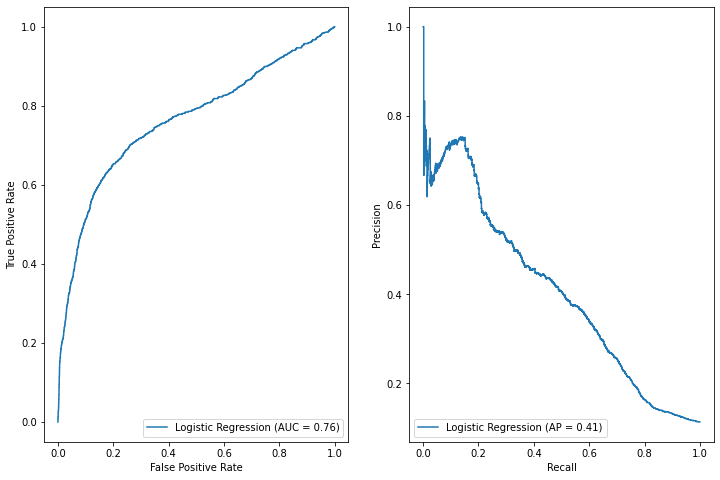

In [ ]:
fpr, tpr, _ = roc_curve(y_test_complete, y_preds, pos_label=clf_lr_complete.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,  roc_auc=roc_auc, estimator_name='Logistic Regression' )

prec, recall, _ = precision_recall_curve(y_test_complete, y_preds,pos_label=clf_lr_complete.classes_[1])
average_precision = average_precision_score(y_test_complete, y_preds)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision = average_precision, estimator_name = 'Logistic Regression' )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)

plt.show()

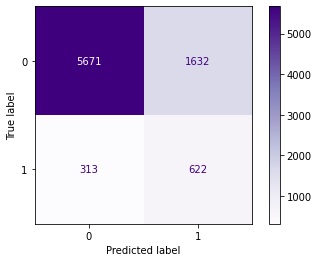

In [ ]:
cm = confusion_matrix(y_test_complete, predictions)

cm_display = ConfusionMatrixDisplay(cm, display_labels=clf_lr_complete.classes_).plot(cmap = 'Purples', values_format = 'd')

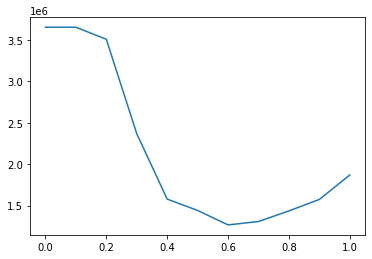

In [ ]:
min_cost_threshold(y_test_complete, y_preds)

In [ ]:
total_cost(y_test_complete, y_preds, threshold = 0.6)

1267500

In [ ]:
%%time
lr = LogisticRegression(max_iter = 500, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )

parameters = {'C':[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]}

clf_lr_fs = GridSearchCV(lr, parameters, cv = 5).fit(X_train_fs, y_train_fs)

CPU times: user 10.6 s, sys: 7.75 s, total: 18.4 s
Wall time: 9.45 s


In [ ]:
clf_lr_fs.best_estimator_

LogisticRegression(C=31, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_preds = clf_lr_fs.predict_proba(X_test_fs)[:,1]
predictions = clf_lr_fs.predict(X_test_fs)

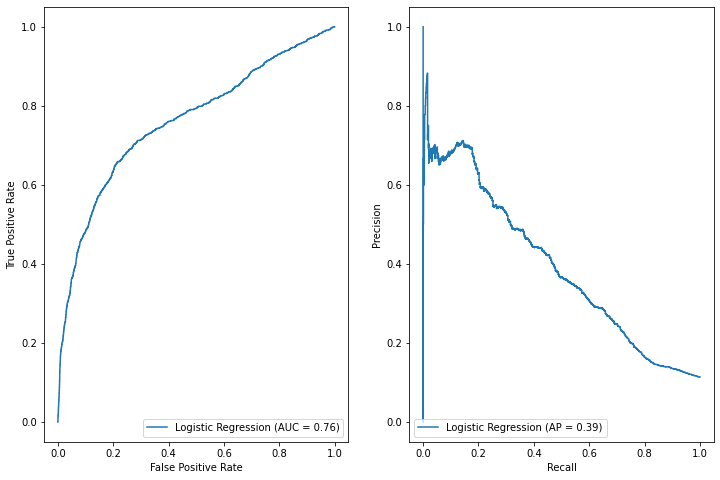

In [ ]:
fpr, tpr, _ = roc_curve(y_test_fs, y_preds, pos_label=clf_lr_fs.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,  roc_auc=roc_auc, estimator_name='Logistic Regression' )

prec, recall, _ = precision_recall_curve(y_test_fs, y_preds,pos_label=clf_lr_fs.classes_[1])
average_precision = average_precision_score(y_test_fs, y_preds)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision = average_precision, estimator_name = 'Logistic Regression' )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)

plt.show()

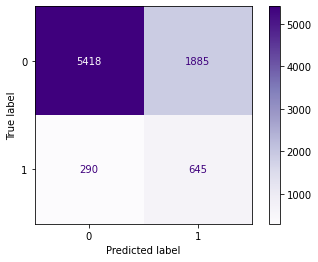

In [ ]:
cm = confusion_matrix(y_test_fs, predictions)

cm_display = ConfusionMatrixDisplay(cm, display_labels=clf_lr_fs.classes_).plot(cmap = 'Purples', values_format = 'd')

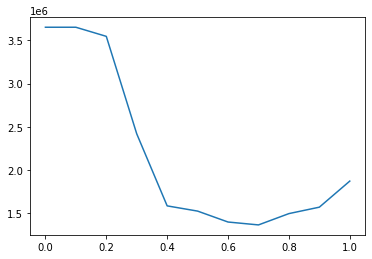

In [ ]:
min_cost_threshold(y_test_fs, y_preds)

In [ ]:
total_cost(y_test_fs, y_preds, threshold = 0.7)

1362500

Usar o dataset completo ou o dataset com feature selection deu o mesmo valor de ROC-AUC. No entanto, na matriz de confusão, é possível apreciar que o dataset com feature selection conseguiu identificar mais casos de True Positives (os que vão aderir à campanha) e minimizar os False Negatives (os que iriam aderir à campanha mas foram identificados como maus candidatos) - isto por si deveria ajudar a reduzir os custos já que o custo de um FN é 2000€. Infelizmente, Feature selection reduziu a capacidade de identificar correctamente os True Negatives, aumentando bastante os Falsos Positivos (os que não iriam aderir à partida mas que foram alvos da campanha). Pelo que o benefício que a feature selection trouxe não foi suficiente para compensar o custo. Daí que o dataset completo tenha um custo menor do que o dataset com feature selection.

O Custo usando um dataset completo é minimo para um threshold de 0.6 e equivale a 1.267.500 Euros, valor que é melhor que a baseline (3.651.500 Euros). Equivale a uma redução de 2/3 dos custos.

# KNN

In [ ]:
%%time
knn = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,10, 1)}

clf_knn_complete = GridSearchCV(knn, parameters, cv = 5).fit(X_train_complete, y_train_complete)

CPU times: user 56.8 s, sys: 0 ns, total: 56.8 s
Wall time: 56.6 s


In [ ]:
clf_knn_complete.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
y_preds = clf_knn_complete.predict_proba(X_test_complete)[:,1]
predictions = clf_knn_complete.predict(X_test_complete)

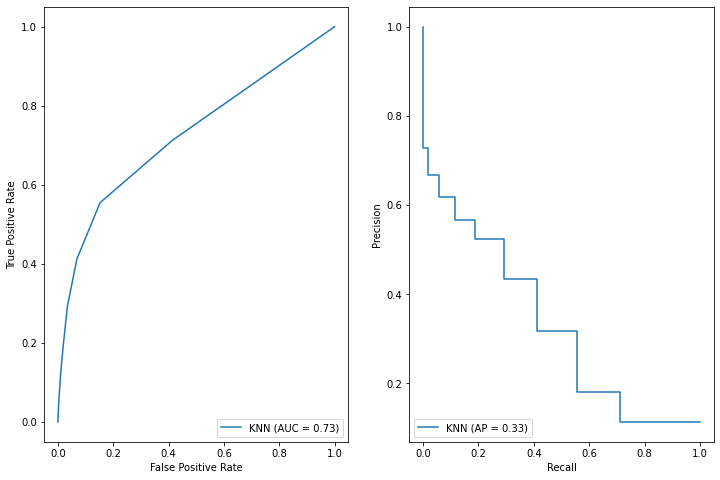

In [ ]:
fpr, tpr, _ = roc_curve(y_test_complete, y_preds, pos_label=clf_knn_complete.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,  roc_auc=roc_auc, estimator_name='KNN' )

prec, recall, _ = precision_recall_curve(y_test_complete, y_preds,pos_label=clf_knn_complete.classes_[1])
average_precision = average_precision_score(y_test_complete, y_preds)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision = average_precision, estimator_name = 'KNN' )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)

plt.show()

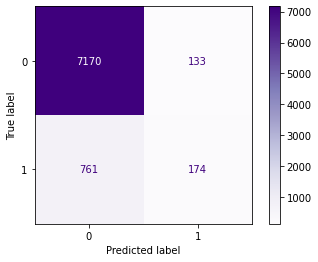

In [ ]:
cm = confusion_matrix(y_test_complete, predictions)

cm_display = ConfusionMatrixDisplay(cm, display_labels=clf_knn_complete.classes_).plot(cmap = 'Purples', values_format = 'd')

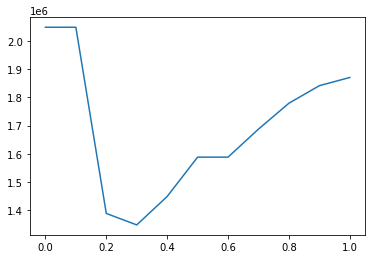

In [ ]:
min_cost_threshold(y_test_complete, y_preds)

In [ ]:
total_cost(y_test_complete, y_preds, threshold = 0.3)

1349000

In [ ]:
%%time
knn = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,10, 1)}

clf_knn_fs = GridSearchCV(knn, parameters, cv = 5).fit(X_train_fs, y_train_fs)

CPU times: user 33.5 s, sys: 107 ms, total: 33.6 s
Wall time: 33.3 s


In [ ]:
clf_knn_fs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
y_preds = clf_knn_fs.predict_proba(X_test_fs)[:,1]
predictions = clf_knn_fs.predict(X_test_fs)

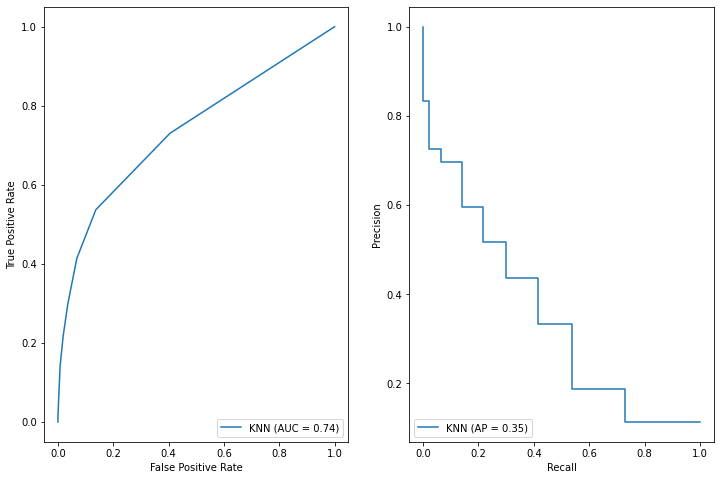

In [ ]:
fpr, tpr, _ = roc_curve(y_test_fs, y_preds, pos_label=clf_knn_fs.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,  roc_auc=roc_auc, estimator_name='KNN' )

prec, recall, _ = precision_recall_curve(y_test_fs, y_preds,pos_label=clf_knn_fs.classes_[1])
average_precision = average_precision_score(y_test_fs, y_preds)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision = average_precision, estimator_name = 'KNN' )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)

plt.show()

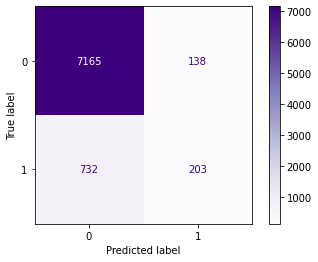

In [ ]:
cm = confusion_matrix(y_test_fs, predictions)

cm_display = ConfusionMatrixDisplay(cm, display_labels=clf_knn_fs.classes_).plot(cmap = 'Purples', values_format = 'd')

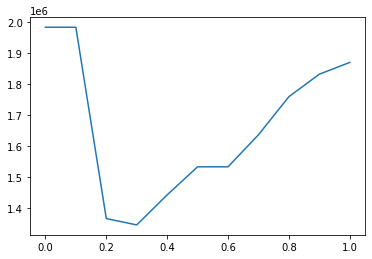

In [ ]:
min_cost_threshold(y_test_fs, y_preds)

In [ ]:
total_cost(y_test_fs, y_preds, threshold = 0.3)

1345500

Este modelo funciona consideravelmente pior do que o anterior em termos de identificação de True Positives - bons candidatos (200 enquanto que o modelo anterior consegue identificar 600). Também tem custos superiores uma vez que identifica mais candidatos como False Negatives (700 enquanto que o modelo anterior consegue identificar 200). Isto reflecte-se no custo, com um custo superior ao do modelo anterior.

Desta vez, feature selection dá resultados marginalmente melhores do que usar o dataset completo, com melhores métricas no geral. O Custo para o dataset com feature selection é minimo para um threshold de 0.3 e equivale a 1.345.500 Euros, valor que é melhor que a baseline (3.651.500 Euros) mas muito pior que o valor obtido na Regressão Logística (1.267.500 Euros). 

# SVM

In [ ]:
%%time

svc = SVC(random_state = seed, class_weight = 'balanced', gamma = 'scale', probability = True, verbose = True)

parameters = {'C':[0.1, 1, 10], 'kernel': ('rbf', 'linear') }


clf_svc_complete = GridSearchCV(svc, parameters, cv = 5).fit(X_train_complete, y_train_complete)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]CPU times: user 2h 31min 13s, sys: 13.7 s, total: 2h 31min 26s
Wall time: 2h 30min 40s


In [ ]:
clf_svc_complete.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=True)

In [ ]:
y_preds = clf_svc_complete.predict_proba(X_test_complete)[:,1]
predictions = clf_svc_complete.predict(X_test_complete)

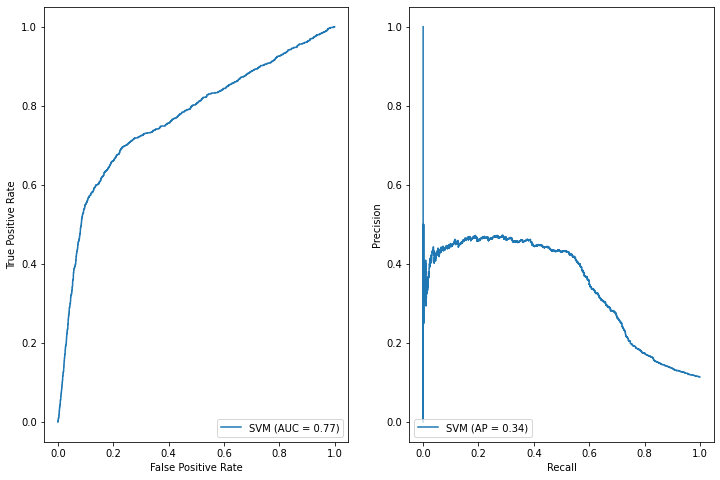

In [ ]:
fpr, tpr, _ = roc_curve(y_test_complete, y_preds, pos_label=clf_svc_complete.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,  roc_auc=roc_auc, estimator_name='SVM' )

prec, recall, _ = precision_recall_curve(y_test_complete, y_preds,pos_label=clf_svc_complete.classes_[1])
average_precision = average_precision_score(y_test_complete, y_preds)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision = average_precision, estimator_name = 'SVM' )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)

plt.show()

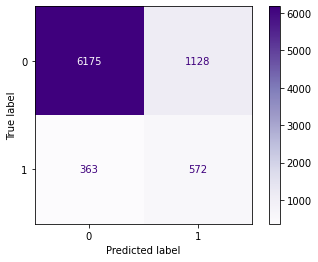

In [ ]:
cm = confusion_matrix(y_test_complete, predictions)

cm_display = ConfusionMatrixDisplay(cm, display_labels=clf_svc_complete.classes_).plot(cmap = 'Purples', values_format = 'd')

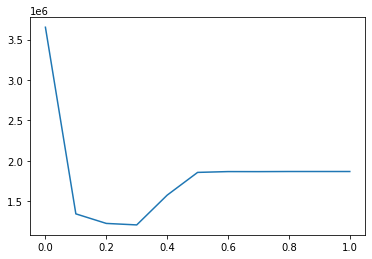

In [ ]:
min_cost_threshold(y_test_complete, y_preds)

In [ ]:
total_cost(y_test_complete, y_preds, threshold = 0.3)

1210500

In [ ]:
%%time

svc = SVC(random_state = seed, class_weight = 'balanced', gamma = 'scale', probability = True, verbose = True)

parameters = {'C':[0.1, 1, 10], 'kernel': ('rbf', 'linear') }


clf_svc_fs = GridSearchCV(svc, parameters, cv = 5).fit(X_train_fs, y_train_fs)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]CPU times: user 1h 58min 3s, sys: 15.7 s, total: 1h 58min 19s
Wall time: 1h 57min 43s


In [ ]:
clf_svc_fs.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=True)

In [ ]:
y_preds = clf_svc_fs.predict_proba(X_test_fs)[:,1]
predictions = clf_svc_fs.predict(X_test_fs)

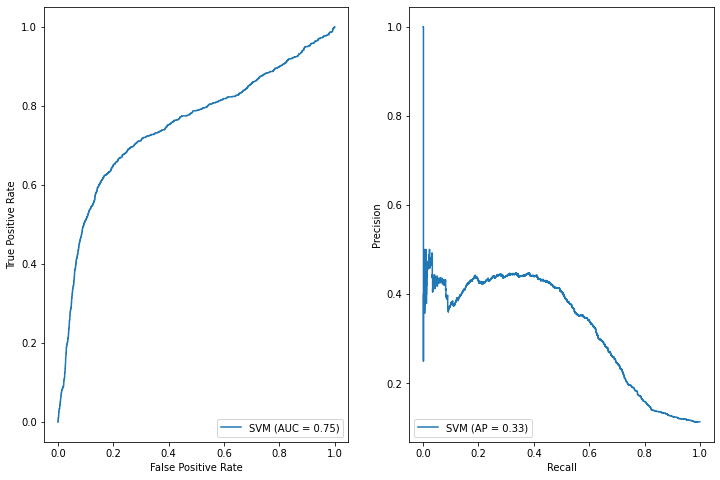

In [ ]:
fpr, tpr, _ = roc_curve(y_test_fs, y_preds, pos_label=clf_svc_fs.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,  roc_auc=roc_auc, estimator_name='SVM' )

prec, recall, _ = precision_recall_curve(y_test_fs, y_preds,pos_label=clf_svc_fs.classes_[1])
average_precision = average_precision_score(y_test_fs, y_preds)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision = average_precision, estimator_name = 'SVM' )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)

plt.show()

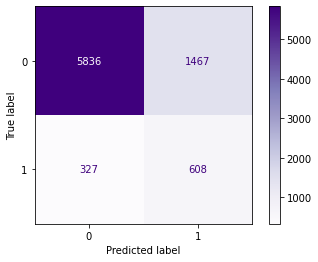

In [ ]:
cm = confusion_matrix(y_test_fs, predictions)

cm_display = ConfusionMatrixDisplay(cm, display_labels=clf_svc_fs.classes_).plot(cmap = 'Purples', values_format = 'd')

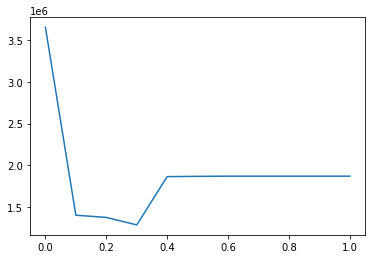

In [ ]:
min_cost_threshold(y_test_fs, y_preds)

In [ ]:
total_cost(y_test_fs, y_preds, threshold = 0.3)

1287000

O SVM com o dataset completo foi o que deu o melhor resultado até agora, com 1.210.500€ de custo para um threshold de 0.3. Com o dataset selecionado, o custo é marginalmente superior (1.287.000€, também para um threshold de 0.3). Tem uma performance semelhante à regressão logística em termos de True Positives e True Negatives, identificando menos False Positives e Negatives e daí reduzindo o custo. 

No entanto, este modelo demorou consideravelmente mais a treinar (mais de 2h para o dataset seleccionado e mais de 2h30 para o dataset completo). Pelo que, se tivesse de optar por Regressão Logística e SVM e o tempo fosse uma condicionante, provavelmente optaria pela RL com o dataset completo. 

# Decision Tree

In [ ]:
%%time

trees = tree.DecisionTreeClassifier(random_state = seed)

parameters = {'max_depth':[3, 6, 9, 12, 15, 18], 'min_samples_split': [500, 1000, 1500, 2000, 2500, 3000]}

clf_tree_complete = GridSearchCV(trees, parameters, cv = 5).fit(X_train_complete, y_train_complete)

CPU times: user 10.3 s, sys: 31.8 ms, total: 10.3 s
Wall time: 10.3 s


In [ ]:
clf_tree_complete.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_preds = clf_tree_complete.predict_proba(X_test_complete)[:,1]
predictions = clf_tree_complete.predict(X_test_complete)

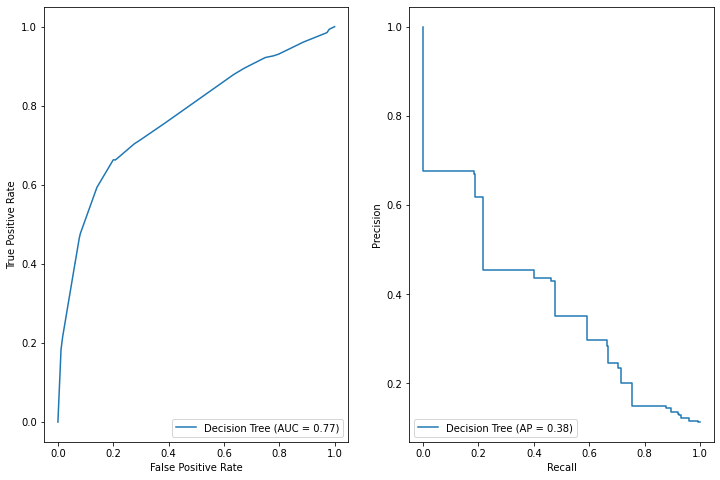

In [ ]:
fpr, tpr, _ = roc_curve(y_test_complete, y_preds, pos_label=clf_tree_complete.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,  roc_auc=roc_auc, estimator_name='Decision Tree' )

prec, recall, _ = precision_recall_curve(y_test_complete, y_preds,pos_label=clf_tree_complete.classes_[1])
average_precision = average_precision_score(y_test_complete, y_preds)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision = average_precision, estimator_name = 'Decision Tree' )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)

plt.show()

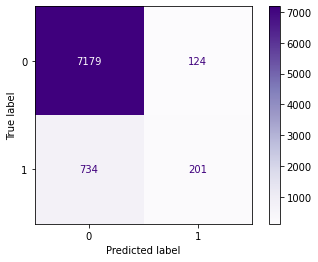

In [ ]:
cm = confusion_matrix(y_test_complete, predictions)

cm_display = ConfusionMatrixDisplay(cm, display_labels=clf_tree_complete.classes_).plot(cmap = 'Purples', values_format = 'd')

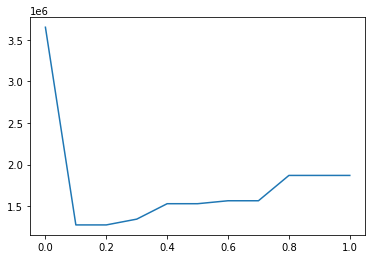

In [ ]:
min_cost_threshold(y_test_complete, y_preds)

In [ ]:
total_cost(y_test_complete, y_preds, threshold = 0.1)

1275000

In [ ]:
%%time

trees = tree.DecisionTreeClassifier(random_state = seed)

parameters = {'max_depth':[3, 6, 9, 12, 15, 18], 'min_samples_split': [500, 1000, 1500, 2000, 2500, 3000]}

clf_tree_fs = GridSearchCV(trees, parameters, cv = 5).fit(X_train_fs, y_train_fs)

CPU times: user 6.73 s, sys: 18.9 ms, total: 6.75 s
Wall time: 6.72 s


In [ ]:
clf_tree_fs.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2000,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_preds = clf_tree_fs.predict_proba(X_test_fs)[:,1]
predictions = clf_tree_fs.predict(X_test_fs)

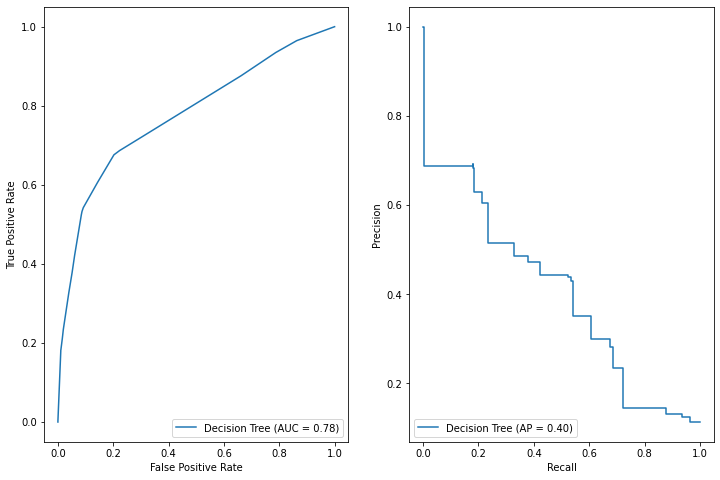

In [ ]:
fpr, tpr, _ = roc_curve(y_test_fs, y_preds, pos_label=clf_tree_fs.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,  roc_auc=roc_auc, estimator_name='Decision Tree' )

prec, recall, _ = precision_recall_curve(y_test_fs, y_preds,pos_label=clf_tree_fs.classes_[1])
average_precision = average_precision_score(y_test_fs, y_preds)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision = average_precision, estimator_name = 'Decision Tree' )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)

plt.show()

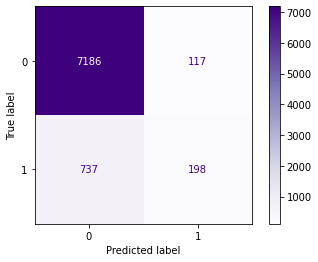

In [ ]:
cm = confusion_matrix(y_test_fs, predictions)

cm_display = ConfusionMatrixDisplay(cm, display_labels=clf_tree_fs.classes_).plot(cmap = 'Purples', values_format = 'd')

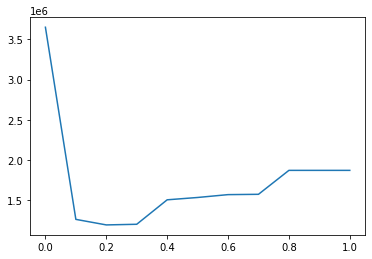

In [ ]:
min_cost_threshold(y_test_fs, y_preds)

In [ ]:
total_cost(y_test_fs, y_preds, threshold = 0.2)

1191000

A Decision Tree deu o melhor resultado em termos de redução de custo até agora, comparado com qualquer outro modelo: o custo é mínimo para um threshold de 0.2 para o dataset seleccionado e é 1.191.000€. 

No entanto, tem pior performance a identificar True Positives comparado com todos os modelos corridos anteriormente (à volta de 200). Se isto fosse um indicador que o banco pedisse para ter em consideração - conseguir fazer um bom profiling do cliente que iria aderir a esta campanha - este modelo poderia não ser o melhor a dar esta resposta. Para além disso, Decision Trees são muito sensíveis a datasets pouco balanceados como é o caso deste, pelo que talvez este modelo possa não ser o mais apropriado, mesmo que seja o que dá os custos menores. 

# Random Forests

In [ ]:
%%time 
rf = RandomForestClassifier(random_state = seed)

parameters = {'n_estimators':[10, 200, 300, 500, 1000]}

clf_rf_complete = GridSearchCV(rf, parameters, cv = 5).fit(X_train_complete, y_train_complete)

CPU times: user 4min 11s, sys: 919 ms, total: 4min 12s
Wall time: 4min 11s


In [ ]:
clf_rf_complete.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_preds = clf_rf_complete.predict_proba(X_test_complete)[:,1]
predictions = clf_rf_complete.predict(X_test_complete)

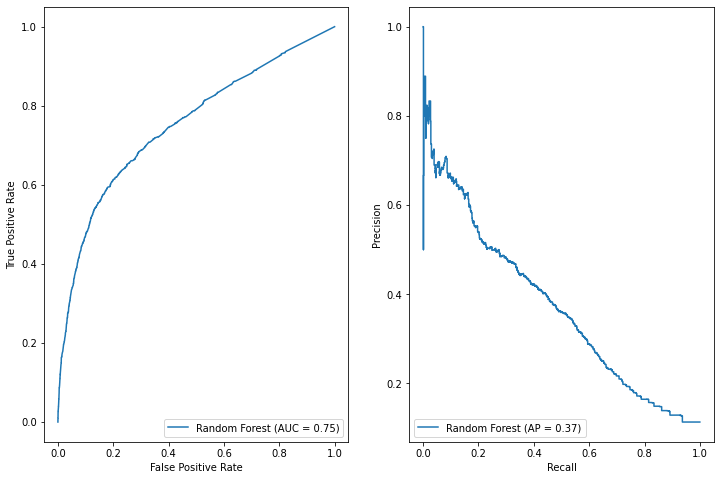

In [ ]:
fpr, tpr, _ = roc_curve(y_test_complete, y_preds, pos_label=clf_rf_complete.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,  roc_auc=roc_auc, estimator_name='Random Forest' )

prec, recall, _ = precision_recall_curve(y_test_complete, y_preds,pos_label=clf_rf_complete.classes_[1])
average_precision = average_precision_score(y_test_complete, y_preds)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision = average_precision, estimator_name = 'Random Forest' )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)

plt.show()

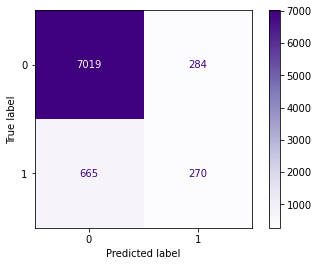

In [ ]:
cm = confusion_matrix(y_test_complete, predictions)

cm_display = ConfusionMatrixDisplay(cm, display_labels=clf_lr_complete.classes_).plot(cmap = 'Purples', values_format = 'd')

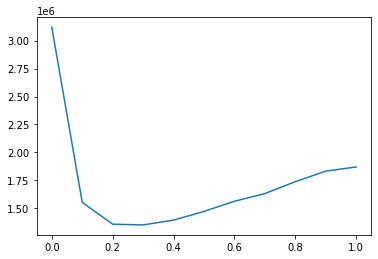

In [ ]:
min_cost_threshold(y_test_complete, y_preds)

In [ ]:
total_cost(y_test_complete, y_preds, threshold = 0.3)

1351500

In [ ]:
%%time 
rf = RandomForestClassifier(random_state = seed)

parameters = {'n_estimators':[800, 1000, 1200, 1500]}

clf_rf_fs = GridSearchCV(rf, parameters, cv = 5).fit(X_train_fs, y_train_fs)

CPU times: user 9min 57s, sys: 3.36 s, total: 10min
Wall time: 9min 58s


In [ ]:
clf_rf_fs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_preds = clf_rf_fs.predict_proba(X_test_fs)[:,1]
predictions = clf_rf_fs.predict(X_test_fs)

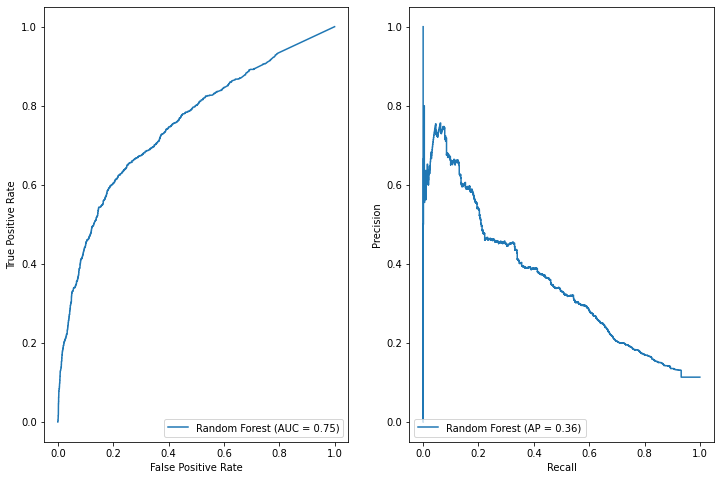

In [ ]:
fpr, tpr, _ = roc_curve(y_test_fs, y_preds, pos_label=clf_rf_fs.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,  roc_auc=roc_auc, estimator_name='Random Forest' )

prec, recall, _ = precision_recall_curve(y_test_fs, y_preds,pos_label=clf_rf_fs.classes_[1])
average_precision = average_precision_score(y_test_fs, y_preds)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision = average_precision, estimator_name = 'Random Forest' )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)

plt.show()

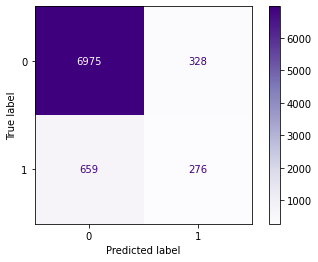

In [ ]:
cm = confusion_matrix(y_test_fs, predictions)

cm_display = ConfusionMatrixDisplay(cm, display_labels=clf_lr_fs.classes_).plot(cmap = 'Purples', values_format = 'd')

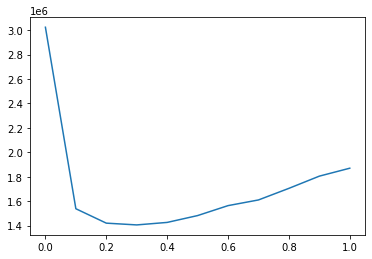

In [ ]:
min_cost_threshold(y_test_fs, y_preds)

In [ ]:
total_cost(y_test_fs, y_preds, threshold = 0.3)

1405500

Random Forest deu valores de custo equivalentes ao que vimos com KNN, sendo que o dataset completo foi o que deu o valor mais baixo (1.351.500€ para um threshold de 0.3). Embora resolva a fragilidade da Decision Tree relativamente ao facto do dataset não ser balanceado, acaba por não dar bons resultados em termos de minimização de custo (embora bem melhor que o baseline, não bate a Regressão Logística com um custo mínimo de 1.267.500€ para o dataset completo). 

# Artificial Neural Network

In [ ]:
%%time

mlp = MLPClassifier(solver = 'lbfgs',  random_state = seed, max_iter = 7000 )

parameters = {'hidden_layer_sizes': [(20,), (20,10), (20, 10, 2)], 'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

clf_mlp_complete = GridSearchCV(mlp, parameters, cv = 5).fit(X_train_complete, y_train_complete)

CPU times: user 2h 12min 47s, sys: 57min 50s, total: 3h 10min 38s
Wall time: 1h 37min 18s


In [ ]:
clf_mlp_complete.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.0001, max_fun=15000, max_iter=7000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_preds = clf_mlp_complete.predict_proba(X_test_complete)[:,1]
prediction = clf_mlp_complete.predict(X_test_complete)

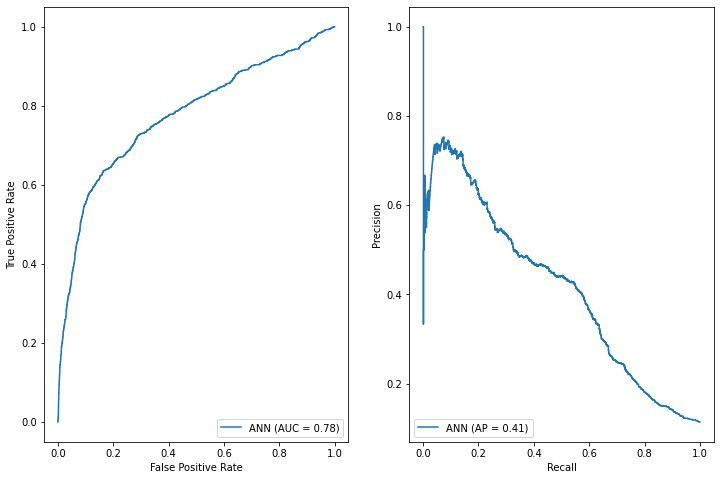

In [ ]:
fpr, tpr, _ = roc_curve(y_test_complete, y_preds, pos_label=clf_rf_complete.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,  roc_auc=roc_auc, estimator_name='ANN' )

prec, recall, _ = precision_recall_curve(y_test_complete, y_preds,pos_label=clf_rf_complete.classes_[1])
average_precision = average_precision_score(y_test_complete, y_preds)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision = average_precision, estimator_name = 'ANN' )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)

plt.show()

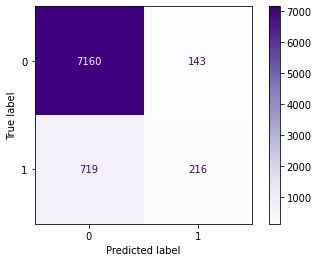

In [ ]:
cm = confusion_matrix(y_test_complete, prediction)

cm_display = ConfusionMatrixDisplay(cm, display_labels=clf_lr_complete.classes_).plot(cmap = 'Purples', values_format = 'd')

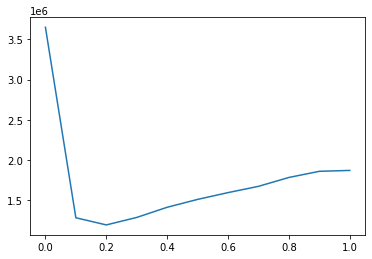

In [ ]:
min_cost_threshold(y_test_complete, y_preds)

In [ ]:
total_cost(y_test_complete, y_preds, threshold = 0.2)

1192000

In [ ]:
%%time

mlp = MLPClassifier(solver = 'lbfgs',  random_state = seed, max_iter = 5000 )

parameters = {'hidden_layer_sizes': [(20,), (20,10), (20, 10, 2)], 'learning_rate_init':[0.0001, 0.001, 0.01, 0.1]}

clf_mlp_fs = GridSearchCV(mlp, parameters, cv = 5).fit(X_train_fs, y_train_fs)

CPU times: user 1h 50min 4s, sys: 49min 33s, total: 2h 39min 37s
Wall time: 1h 21min 31s


In [ ]:
clf_mlp_fs.best_estimator_

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10, 2), learning_rate='constant',
              learning_rate_init=0.0001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_preds = clf_mlp_fs.predict_proba(X_test_fs)[:,1]
prediction = clf_mlp_fs.predict(X_test_fs)

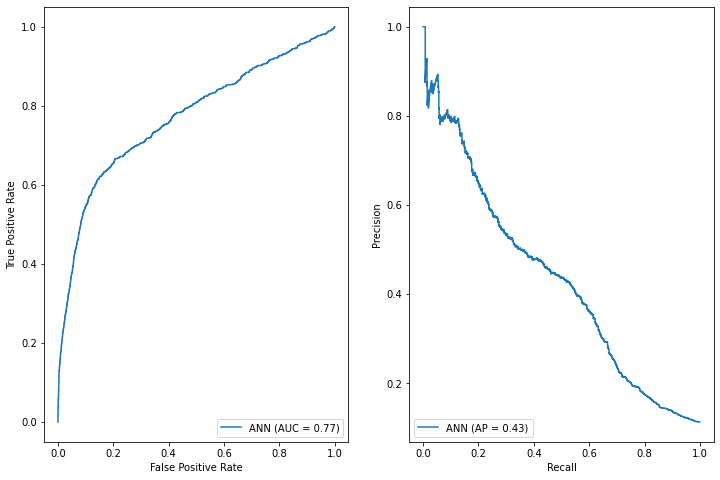

In [ ]:
fpr, tpr, _ = roc_curve(y_test_fs, y_preds, pos_label=clf_rf_fs.classes_[1])
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,  roc_auc=roc_auc, estimator_name='ANN' )

prec, recall, _ = precision_recall_curve(y_test_fs, y_preds,pos_label=clf_rf_fs.classes_[1])
average_precision = average_precision_score(y_test_fs, y_preds)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision = average_precision, estimator_name = 'ANN' )

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)

plt.show()

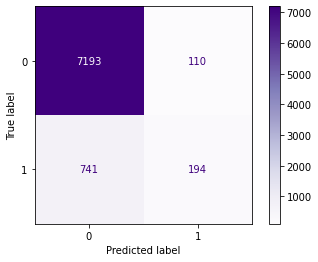

In [ ]:
cm = confusion_matrix(y_test_fs, prediction)

cm_display = ConfusionMatrixDisplay(cm, display_labels=clf_lr_fs.classes_).plot(cmap = 'Purples', values_format = 'd')

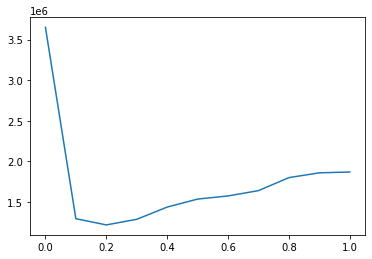

In [ ]:
min_cost_threshold(y_test_fs, y_preds)

In [ ]:
total_cost(y_test_fs, y_preds, threshold = 0.2)

1219000

Este modelo tem uma performance comparável com a Decision Tree em termos de redução de custos (curiosamente, comporta-se melhor com um dataset completo, o que pode fazer sentido uma vez que geralmente as Neural Networks não necessistam de tanto pre-processamento dos dados). Em termos da confusion matrix, apresenta resultados muito semelhantes ao que vemos com a Decision Tree. 

Infelizmente é uma black box e, se escolhessemos este modelo, não poderíamos explicar ao banco Rumos quais as variáveis que melhor explicam os resultados. Se explicabilidade é um requisito para a escolha do modelo, ANN não são uma boa escolha.

## Em suma:

In [ ]:
data = {'True_Negative': [5672, 5418, 7170, 7165, 6175, 5836, 7179, 7186, 7019, 6975, 7160, 7193], 'True_Positive': [622, 645, 174, 203, 572, 608, 201, 198, 270, 276, 216, 194], 
        'False_Positive': [1631, 1885, 133, 138, 1128, 1467, 124, 117, 284, 328, 143, 110], 'False_Negative': [313, 290, 761, 732, 363, 327, 734, 737, 665, 659, 719, 741],
        'Custo': ['1.267.500€', '1.362.500€', '1.349.000€', '1.345.500€', '1.210.500€', '1.287.000€', '1.275.000€', '1.191.000€', '1.351.500€', '1.405.500€', '1.192.000€', '1.219.000€']}

In [ ]:
summary_data = pd.DataFrame(data, index = ['LR_completo', 'LR_FS', 'KNN_completo', 'KNN_FS', 'SVM_completo', 'SVM_FS', 'DecisionTree_completo', 'DecisionTree_FS', 'RandomForest_completo', 'RandomForest_FS', 'ANN_completo', 'ANN_FS'])

In [ ]:
summary_data

,True_Negative,True_Positive,False_Positive,False_Negative,Custo
LR_completo,5672,622,1631,313,1.267.500€
LR_FS,5418,645,1885,290,1.362.500€
KNN_completo,7170,174,133,761,1.349.000€
KNN_FS,7165,203,138,732,1.345.500€
SVM_completo,6175,572,1128,363,1.210.500€
SVM_FS,5836,608,1467,327,1.287.000€
DecisionTree_completo,7179,201,124,734,1.275.000€
DecisionTree_FS,7186,198,117,737,1.191.000€
RandomForest_completo,7019,270,284,665,1.351.500€
RandomForest_FS,6975,276,328,659,1.405.500€


Existem diferenças na maioria dos modelos quando se usa datasets completos ou pré-selecionados, sendo que a maioria (4 de 6) dos modelos apresenta melhores resultados na métrica de custo com datasets completos do que pré-selecionados. 

QUando olhamos para outras métricas o mesmo já não acontece: por exemplo, a identificar True Positives (os clientes que realmente aderem à campanha), a maioria dos modelos (4 em 6) tem melhor performance com o dataset pré-selecionado do que com o dataset completo. Também a identificar erradamente clientes como não aderentes mas que na realidade iriam aderir (Falsos Negativos), o dataset pré-selecionado costuma ter melhor performance, identificando menos clientes erradamente. 

Por isso, fazer uma pré-selecção das features pode ter interesse e tem realmente impacto. Primeiro, reduz o tempo de treino dos modelos (ter mais features torna o processo de treino mais moroso no geral), depois permite melhores resultados em termos de outras métricas. Por isso, no final, é importante implementar diferentes estratégias e escolher a que trás mais benefícios. 

# Perguntas e Respostas

1. Quantas features estão disponíveis? Quantos clientes?

* estão disponíveis 16 features
* o dataset tem 41188 clientes

2. Quantos clientes têm no dataset que efectivamente aderiram ao depósito a prazo? E quantos não o fizeram?

Dos 41188 clientes presentes no dataset, apenas 4640 aderiram ao depósito a prazo, o que equivale a 11% do dataset - os restantes 89% não aderiram. Estamos na presença de um dataset não balanceado, pelo que devemos ter isso em atenção quando formos escolher as métricas a usar para comparar a baseline aos modelos preditivos e também na escolha do próprio modelo em si (alguns são mais sensíveis a este tipo de problemas que outros).

3. Quais são as features mais relevantes para decidir se um cliente tem mais propensão para aderir ao depósito a prazo?

In [ ]:
# Features mais importantes para a Decision Tree com o dataset pré-seleccionado - melhor redução de custo para 1.191.000€
dt = tree.DecisionTreeClassifier(**clf_tree_fs.best_params_).fit(X_train_fs, y_train_fs)

In [ ]:
important_features_dt = pd.DataFrame(data = dt.feature_importances_, index = X_train_fs.columns, columns = ['value'])
important_features_dt.sort_values(by = 'value', ascending = False)

,value
euribor3m,0.813518
pdays,0.115550
cons.conf.idx,0.061329
poutcome,0.006325
previous,0.003278
age,0.000000
education,0.000000
default,0.000000
marital_numerical,0.000000


In [ ]:
# Features mais importantes para a Regressão Logística para o dataset completo - segunda melhor redução de custo (explicável) para 1.267.500€
lr = LogisticRegression(**clf_lr_complete.best_params_).fit(X_train_complete, y_train_complete)

In [ ]:
important_features_lr = pd.DataFrame(data = lr.coef_[0], index = X_train_complete.columns, columns = ['Coef'])
important_features_lr.sort_values(by = 'Coef', ascending = False)

,Coef
cons.price.idx,1.432526
pdays,1.060014
poutcome,0.895203
default,0.711150
cons.conf.idx,0.495220
age,0.459588
euribor3m,0.329590
marital_numerical,0.308855
education,0.242862
job_numerical,0.106700


Para a Decision Tree, a que deu o melhor valor de custo de todos os modelos corridos, a feature com maior relevancia é a Euribor a 3 meses. Para a regressão logística, que deu o segundo melhor valor de custo para todos os modelos corridos e que sejam explicáveis (aka não sejam black boxes como as ANN) ou que não demorem imenso tempo a treinar (SVMs), a feature com mais impacto é a cons.price.idx. Curiosamente, ambos os modelos concordam que a segunda feature com mais impacto é pdays. Uma vez que a Regressão Logística é mais robusta do que a Decision Tree e é um modelo mais simples, estou inclinada em sugerir a Regressão Logística usando o dataset completo, mesmo que o custo seja ligeiramente mais elevado (76.500€ mais elevado, para ser preciso e usando só os valores do dataset de teste - aplicando isto ao dataset completo, o valor vai ser superior).

4. Qual o algoritmo que levou aos melhores resultados?

Todos os modelos implementados levaram a reduções significativas do custo. O melhor modelo foi a Decision Tree, com um custo de 1.191.000€ - menos 2.460.500€ do que se não usarem modelo nenhum. Embora este modelo seja optimo de explicar ao cliente, uma vez que podemos até visualizar a árvore que lhe deu origem e ver as features que mais contribuiram para as decisões, este modelo é passível de sofrer overfit, tornando-se pouco generalizável, é mais sensível a ruído e pode manifestar um bias com datasets não balanceados, o que é o caso. 

O segundo melhor modelo foi a Artificial Neural Network, com um custo de 1.192.000€ - menos 2.459.500€ do que se não usarem modelo nenhum. No entanto, ANN é uma black box - não permite explicar ao cliente quais as features que têm maior impacto nos resultados - e é custoso em termos de tempo (demorou cerca de uma hora a treinar).

O terceiro melhor modelo foi a Regressão Logística, com um custo de 1.267.500€ - menos 2.384.000€ do que se não usarem modelo nenhum. Este modelo, por ser simples e computacionalmente eficiente, é interpretável (permite perceber quais as features que têm maior e menor impacto na classificação)  e não necessita de grande optimização de hiperparametros sem ser a regularização, pelo que não demora imenso a treinar. Embora não tenha sido o melhor em termos de redução do custo, este seria o modelo que eu iria sugerir como Data Scientist, pois não só a redução de custos foi ainda assim significativa, como também identifica bastante bem potenciais clientes e minimiza os False Negatives que trazem o maior custo (2000€ por cada um). 

5. Qual/Quais as métricas de avaliação que usaram para comparar a performance dos vários modelos? Porquê?

A melhor métrica a usar é aquela que nos permite comunicar claramente com o cliente (neste caso, o banco Rumos) o impacto de usar o nosso modelo de Machine Learning para resolver o problema em questão. 

Uma vez que o banco nos dá valores de custo para algumas situações (nomeadamente, o custo de ter falsos positivos e falsos negativos), um cálculo do impacto que o nosso modelo preditivo terá no minimizar desse custo é uma boa estratégia para comunicar qual o melhor modelo ao cliente. Idealmente, teríamos também valores para os outros dois casos (true positive e true negative), que provavelmente trariam lucros às contas. Ter a 'full picture' poderia ajudar a determinar qual dos casos era mais vantajoso focar com o nosso modelo (minimizar FP - elevada precisão do modelo; minimizar FN - elevado recall). Ainda assim, é previsível que no fundo se queira maximizar os TP, realmente identificar bem os TN e minimizar os FN uma vez que estes são os trazem maior custo ao banco (2000€ - recall elevado). Daí que no final tenha optado pela Regressão Logística, pois foi o modelo que melhor identificou os clientes que verdadeiramente aderem à campanha e minimizou os FN. 


6. Qual é o custo que o banco tem sem nenhum modelo?

O custo que o banco teria sem modelo, ou seja, assumindo que todos os clientes adeririam à campanha, é de 3.651.500 Euros.

7. Qual o custo que o banco passa a ter com o vosso modelo?

* Se for com o modelo mais robusto e que identificou mais clientes (Regressão Logística): 1.267.500€
* Se for com o modelo menos robusto mas que deu melhor resultado (Decision Tree): 1.191.00€
* Se for com um modelo intermédio (robusto, mas incapaz de ser explicado - ANN): 1.192.000€